# Lokalizacja Punktu w Podziale Planarnym
## Metoda Łańcuchów Monotonicznych (Chain Method)

**Autorzy:** [Twoje imię i nazwisko]

**Data:** Styczeń 2026

---

## 1. Wprowadzenie do Problemu

### 1.1 Definicja Problemu Lokalizacji Punktu

Problem lokalizacji punktu w geometrii obliczeniowej polega na określeniu, który region zawiera zadany punkt testowy. Formalnie: mając podział płaszczyzny na regiony $R_0, R_1, \ldots, R_n$ oraz punkt testowy $p$, należy wskazać region $R_i$ zawierający $p$.

### 1.2 Metoda Łańcuchów Monotonicznych

Metoda łańcuchów wykorzystuje specjalne struktury geometryczne - **łańcuchy monotoniczne** - do podzielenia płaszczyzny na regiony. Lokalizacja punktu odbywa się poprzez sprawdzanie położenia punktu względem kolejnych łańcuchów.

**Kluczowe właściwości łańcucha monotonicznego:**
- Każda prosta pozioma przecina łańcuch w co najwyżej jednym punkcie
- Współrzędna $y$ wierzchołków jest rosnąca lub malejąca wzdłuż łańcucha
- Umożliwia efektywne porównanie położenia punktu

### 1.3 Struktura Danych - Drzewo Łańcuchów

Algorytm wykorzystuje **binarne drzewo łańcuchów** (chain tree), w którym:
- **Liście** reprezentują regiony płaszczyzny
- **Węzły wewnętrzne** zawierają łańcuchy separujące regiony
- Dla węzła z łańcuchem $C_k$: regiony $R_1, \ldots, R_k$ znajdują się po lewej stronie, a $R_{k+1}, \ldots, R_n$ po prawej

Optymalizacja: każdy odcinek krawędzi przechowywany jest tylko raz - w najwyższym węźle drzewa, w którym się pojawia.

## 2. Podstawy Teoretyczne

### 2.1 Reprezentacja Grafu Planarnego

Planarny graf prostoliniowy (PSLG - Planar Straight Line Graph) definiujący podział płaszczyzny składa się z:

**Wierzchołki:** Każdy wierzchołek $v_i$ reprezentowany przez współrzędne $(x_i, y_i)$. Dla $n$ wierzchołków wymagana pamięć: $O(n)$.

**Krawędzie:** Informacje o krawędziach przechowywane w listach sąsiedztwa wierzchołków. Każda krawędź pojawia się dwukrotnie (w listach obu końców), więc łączna złożoność pamięciowa: $O(n)$.

**Regiony:** Dla każdego regionu przechowujemy listę wierzchołków go ograniczających, uporządkowanych zgodnie z ruchem wskazówek zegara. Region zapisany jako $v_1, v_2, v_3, \ldots, v_k$ odpowiada regionowi z krawędziami $(v_1 v_2), (v_2 v_3), \ldots, (v_k v_1)$. Złożoność pamięciowa: $O(n)$.

### 2.2 Graf Dualny (Inverse Graph)

Konstrukcja drzewa łańcuchów wymaga utworzenia grafu dualnego:
- Każdemu regionowi $R_i$ odpowiada węzeł grafu dualnego
- Dla każdej krawędzi $e$ łączymy regiony znajdujące się po jej lewej i prawej stronie

**Algorytm identyfikacji stron krawędzi:**

Dla krawędzi $e$:
1. Znajdź dwa regiony zawierające $e$ na brzegu
2. Dla każdego regionu wyznacz wierzchołki $p_{hi}$ i $p_{lo}$ o maksymalnej i minimalnej współrzędnej $y$
3. Sprawdź, czy $e$ należy do lewego czy prawego łańcucha łączącego te wierzchołki

Przy przechowywaniu krawędzi w kolejności zgodnej z ruchem wskazówek zegara, wystarczy porównać współrzędne $x$ końców $e$ z krawędzią na przeciwnej ścieżce.

Złożoność czasowa konstrukcji grafu dualnego: $O(n^2)$.

### 2.3 Sortowanie Topologiczne

Sortowanie topologiczne grafu dualnego ustala porządek regionów. Można je zaimplementować jako wariant przeszukiwania wszerz (BFS), co daje złożoność czasową $O(n)$.

Regiony przypisujemy do liści drzewa binarnego zgodnie z tym porządkiem: $R_1$ do skrajnie lewego liścia, $R_2$ do drugiego od lewej, itd.

Łańcuchy $C_1, \ldots, C_n$ przypisujemy do węzłów zgodnie z przeszukiwaniem w porządku pre-order, co zapewnia właściwą relację między łańcuchami a regionami.

## 3. Preprocessing - Budowa Drzewa Łańcuchów

### 3.1 Przypisanie Krawędzi do Węzłów

**Metoda brutalna:** Dla każdego łańcucha (w kolejności in-order) sprawdzamy, czy każda krawędź jest już przechowana w węźle przodka. Jeśli nie, zapisujemy ją w bieżącym węźle. Złożoność: $O(n^2)$.

**Metoda optymalna:** Rozważamy każdą krawędź osobno:
1. Wykorzystując informacje o regionach po lewej i prawej stronie krawędzi, identyfikujemy odpowiadające im liście drzewa
2. Umieszczamy krawędź w węźle najniższego wspólnego przodka (LCA) tych liści
3. Sortujemy listy krawędzi w każdym węźle

**Znajdowanie LCA w czasie stałym:**
- Przypisujemy etykiety 0 (krawędzie do lewego dziecka) i 1 (do prawego)
- Z każdym liściem związujemy sekwencję etykiet na ścieżce od korzenia
- Numerujemy węzły wewnętrzne w kolejności in-order
- Dla węzłów o numerach $a$ i $b$: LCA = $2^{\lfloor \log_2(a \oplus b) \rfloor} - 1$ (gdzie $\oplus$ to XOR)

Przy wstępnym przeliczeniu i stablicowaniu wartości, LCA znajdujemy w $O(1)$.

Sortowanie wierzchołków fikcyjnych (umieszczonych w środkach krawędzi) topologicznie: $O(n)$.

**Łączna złożoność preprocessingu:** $O(n^2)$

### 3.2 Transformacja dla Regionów Niemonotoniczh

Metoda łańcuchów wymaga regionów z granicami monotoniczymi. Dowolny podział można przekształcić w monototoniczny poprzez dodanie nowych krawędzi.

**Punkty załamania monotoniczności (cusps):**
- **Cusp w górę:** Obie krawędzie wychodzące z wierzchołka $v$ leżą poniżej linii poziomej przez $v$
- **Cusp w dół:** Obie krawędzie leżą powyżej linii poziomej

**Algorytm eliminacji:**

*Przebieg zstępujący* (eliminacja cuspów w górę):
1. Sortuj wierzchołki malejąco według $y$
2. Inicjalizuj listę krawędzi przecinanych przez linię zamiatającą
3. Dla każdego wierzchołka $v_i$:
   - Jeśli $v_i$ to cusp w dół: aktualizuj powiązania i usuń krawędzie
   - Jeśli $v_i$ to cusp w górę: dodaj nową krawędź łączącą $v_i$ z wierzchołkiem o najniższej współrzędnej $y$ powyżej
   - W przeciwnym wypadku: aktualizuj powiązania

*Przebieg wstępujący* (eliminacja cuspów w dół) przebiega analogicznie w przeciwnym kierunku.

**Złożoność czasowa:** $O(n \log n)$ - zdominowana przez początkowe sortowanie wierzchołków.

Po transformacji wszystkie powstałe regiony monototoniczne oznaczamy etykietą oryginalnego wielokąta $P$, aby algorytm lokalizacji zwracał prawidłowy region.

## 4. Implementacja

### 4.1 Import Bibliotek i Konfiguracja

In [1]:
import math
from typing import List, Tuple, Optional, Union, Any
from functools import cmp_to_key
from data import raw

TOLERANCE = 1e-9

### 4.2 Struktury Danych

Implementacja kluczowych klas reprezentujących elementy algorytmu.

In [2]:
class Vertex:
    def __init__(self, x_coord: float, y_coord: float):
        self.x = x_coord
        self.y = y_coord
        self.adj_out: List[Tuple['Vertex', int]] = []
        self.adj_in: List[Tuple['Vertex', int]] = []
        self.accumulated_weight_in = 0
        self.accumulated_weight_out = 0

    @property
    def coords(self) -> Tuple[float, float]:
        return self.x, self.y

    def __repr__(self):
        return f"V({self.x:.2f}, {self.y:.2f})"

class MonotoneChain:
    def __init__(self):
        self.path_vertices: List[Tuple[float, float]] = []
        self.path_segments: List[Tuple[Tuple[float, float], Tuple[float, float]]] = []

    def add_node(self, coords: Tuple[float, float]):
        self.path_vertices.append(coords)

    def add_segment(self, start: Tuple[float, float], end: Tuple[float, float]):
        self.path_segments.append((start, end))

class SearchTreeNode:
    def __init__(self, segments: List, chain_ref: MonotoneChain, parent: Optional['SearchTreeNode'] = None):
        self.left_child: Optional[SearchTreeNode] = None
        self.right_child: Optional[SearchTreeNode] = None
        self.parent = parent
        self.segments = segments
        self.chain_ref = chain_ref

### 4.3 Funkcje Geometryczne

Podstawowe operacje geometryczne wykorzystywane w algorytmie.

In [3]:
def cross_product(o: Tuple[float, float], a: Tuple[float, float], b: Tuple[float, float]) -> float:
    return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])

### 4.4 Przetwarzanie Grafu

#### 4.4.1 Budowa Grafu z Danych Wejściowych

In [4]:
def build_graph(raw_vertices: List[Tuple[float, float]], raw_edges: List[Tuple[int, int]]) -> List[Vertex]:
    graph_nodes = [Vertex(x, y) for x, y in raw_vertices]
    for start_idx, end_idx in raw_edges:
        # Ensure edges point upwards (or rightwards for equal Y) to maintain DAG property
        u, v = sorted((start_idx, end_idx))
        node_u = graph_nodes[u]
        node_v = graph_nodes[v]
        node_u.adj_out.append((node_v, 1))
        node_v.adj_in.append((node_u, 1))
    return graph_nodes

#### 4.4.2 Obliczanie Wag Planarnych

Algorytm dwuprzebiegowy do wyznaczania wag krawędzi zapewniających poprawną dekompozycję na łańcuchy monototoniczne.

In [5]:
def compute_planar_weights(graph: List[Vertex]):
    for node in graph:
        center = node.coords
        
        # Sort edges angularly to identify "leftmost" and "rightmost" paths
        def angular_comparator(edge1, edge2):
            p1 = edge1[0].coords
            p2 = edge2[0].coords
            cp = cross_product(center, p1, p2)
            if math.isclose(cp, 0, abs_tol=TOLERANCE): return 0
            return -1 if cp > 0 else 1

        node.adj_out.sort(key=cmp_to_key(angular_comparator))
        node.adj_in.sort(key=cmp_to_key(lambda a, b: -1 * angular_comparator(a, b)))

    # Forward pass: Propagate weights from bottom to top
    for i in range(1, len(graph) - 1):
        v = graph[i]
        v.accumulated_weight_in = sum(w for _, w in v.adj_in)
        v.accumulated_weight_out = len(v.adj_out)
        
        # if input flow > output flow, push excess to leftmost outgoing edge
        if v.accumulated_weight_in > v.accumulated_weight_out:
            target_node, current_w = v.adj_out.pop(0)
            new_weight = current_w + v.accumulated_weight_in - v.accumulated_weight_out
            v.adj_out.insert(0, (target_node, new_weight))
            
            # Update the corresponding incoming edge at the target node
            for idx, (neighbor, w) in enumerate(target_node.adj_in):
                if neighbor == v:
                    target_node.adj_in[idx] = (v, new_weight)
                    break

    # Backward pass: Propagate weights from top to bottom
    for i in range(len(graph) - 2, 0, -1):
        v = graph[i]
        v.accumulated_weight_in = sum(w for _, w in v.adj_in)
        v.accumulated_weight_out = sum(w for _, w in v.adj_out)
        
        # If output flow > input flow, pull excess from leftmost incoming edge
        if v.accumulated_weight_out > v.accumulated_weight_in:
            source_node, current_w = v.adj_in.pop(0)
            new_weight = current_w + v.accumulated_weight_out - v.accumulated_weight_in
            v.adj_in.insert(0, (source_node, new_weight))
            
            for idx, (neighbor, w) in enumerate(source_node.adj_out):
                if neighbor == v:
                    source_node.adj_out[idx] = (v, new_weight)
                    break

#### 4.4.3 Generowanie Łańcuchów Monotonicznych

Zachłanny algorytm konstrukcji łańcuchów poprzez konsumpcję wag krawędzi.

In [6]:
def generate_monotone_chains(graph: List[Vertex]) -> List[MonotoneChain]:
    source_node = graph[0]
    total_chains = sum(w for _, w in source_node.adj_out)
    chains = [MonotoneChain() for _ in range(total_chains)]
    
    for chain in chains:
        current_v = source_node
        
        # Traverse graph greedily consuming edge weights
        while current_v.adj_out:
            chain.add_node(current_v.coords)
            chosen_idx = -1
            
            # Pick the rightmost available edge (non-zero weight)
            for i in range(len(current_v.adj_out) - 1, -1, -1):
                neighbor, weight = current_v.adj_out[i]
                if weight > 0:
                    chosen_idx = i
                    break
            if chosen_idx == -1: break
            
            next_v, w = current_v.adj_out[chosen_idx]
            current_v.adj_out[chosen_idx] = (next_v, w - 1) # Decrease capacity
            current_v = next_v
            
        chain.add_node(current_v.coords)
        
        verts = chain.path_vertices
        for k in range(len(verts) - 1):
            chain.add_segment(verts[k], verts[k+1])
    return chains

#### 4.4.4 Tworzenie Drzewa Wyszukiwania

Rekursyjna konstrukcja binarnego drzewa wyszukiwania dla łańcuchów.

In [7]:
def create_search_structure(chains: List[MonotoneChain], parent: Optional[SearchTreeNode] = None) -> Optional[SearchTreeNode]:
    if not chains: return None
    mid_idx = len(chains) // 2
    median_chain = chains[mid_idx]
    
    node = SearchTreeNode(median_chain.path_segments, median_chain, parent)
    node.left_child = create_search_structure(chains[:mid_idx], node)
    node.right_child = create_search_structure(chains[mid_idx + 1:], node)
    return node

### 4.5 Logika Zapytań

#### 4.5.1 Określenie Pozycji Względem Łańcucha

In [8]:
def find_position_relative_to_chain(point: Tuple[float, float], node: SearchTreeNode) -> int:
    px, py = point
    segments = node.segments
    target_segment = None
    
    # Binary Search to find the segment covering the point's Y-coordinate
    left_idx, right_idx = 0, len(segments) - 1
    
    while left_idx <= right_idx:
        mid_idx = (left_idx + right_idx) // 2
        p1, p2 = segments[mid_idx]
        
        y_min, y_max = p1[1], p2[1]
        
        if y_min - TOLERANCE <= py <= y_max + TOLERANCE:
            target_segment = (p1, p2)
            break
        elif py < y_min:
            right_idx = mid_idx - 1
        else:
            left_idx = mid_idx + 1
            
    if target_segment is None: 
        return 1
    
    cp = cross_product(target_segment[0], target_segment[1], point)
    
    if math.isclose(cp, 0, abs_tol=TOLERANCE):
        # Handle collinear points: check if strictly inside segment bounds
        x1, x2 = target_segment[0][0], target_segment[1][0]
        if min(x1, x2) - TOLERANCE < px < max(x1, x2) + TOLERANCE:
            return 0  # On chain
        return -1 if px < min(x1, x2) else 1
    
    return -1 if cp < 0 else 1

#### 4.5.2 Przeszukiwanie Drzewa

Główna funkcja lokalizacji punktu w drzewie łańcuchów.

In [9]:
def query_location(point: Tuple[float, float], root: SearchTreeNode) -> SearchTreeNode:
    current = root
    
    while True:
        position = find_position_relative_to_chain(point, current)
        
        if position == 0:
            # Point is on the chain
            return current
        elif position < 0:
            # Point is to the left
            if current.left_child:
                current = current.left_child
            else:
                return current
        else:
            # Point is to the right
            if current.right_child:
                current = current.right_child
            else:
                return current

### 4.6 Wizualizacja

#### 4.6.1 Funkcje Pomocnicze Wizualizacji

In [10]:
def color_map(val: float, min_val: float = 0.0, max_val: float = 1.0) -> Tuple[float, float, float]:
    norm = (val - min_val) / (max_val - min_val) if max_val != min_val else 0.5
    norm = max(0.0, min(1.0, norm))
    return (0.2 + 0.6 * norm, 0.2 + 0.4 * (1 - norm), 0.8 - 0.4 * norm)

In [11]:
def draw_graph(graph: List[Vertex], ax, highlight_edges: List = None):
    import matplotlib.pyplot as plt
    
    if highlight_edges is None:
        highlight_edges = []
    
    # Draw all edges
    for v in graph:
        for neighbor, weight in v.adj_out:
            edge_id = (v.coords, neighbor.coords)
            is_highlighted = edge_id in highlight_edges or (neighbor.coords, v.coords) in highlight_edges
            
            color = 'red' if is_highlighted else 'gray'
            linewidth = 2.5 if is_highlighted else 1.0
            alpha = 1.0 if is_highlighted else 0.5
            
            ax.plot([v.x, neighbor.x], [v.y, neighbor.y], 
                   color=color, linewidth=linewidth, alpha=alpha, zorder=1)
    
    # Draw vertices
    for v in graph:
        ax.plot(v.x, v.y, 'o', color='black', markersize=5, zorder=2)

In [12]:
def draw_chains(chains: List[MonotoneChain], ax):
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    
    cmap = cm.get_cmap('viridis', len(chains))
    
    for idx, chain in enumerate(chains):
        color = cmap(idx)
        vertices = chain.path_vertices
        
        if len(vertices) < 2:
            continue
            
        x_coords = [v[0] for v in vertices]
        y_coords = [v[1] for v in vertices]
        
        ax.plot(x_coords, y_coords, color=color, linewidth=2.5, alpha=0.7, 
               label=f'Łańcuch {idx+1}', zorder=3)
        
        # Mark start and end
        ax.plot(x_coords[0], y_coords[0], 'o', color=color, markersize=8, zorder=4)
        ax.plot(x_coords[-1], y_coords[-1], 's', color=color, markersize=8, zorder=4)

In [13]:
def visualize_tree_structure(root: SearchTreeNode, depth: int = 0, prefix: str = ""):
    if root is None:
        return
    
    chain_info = f"Łańcuch z {len(root.segments)} segmentami"
    print(f"{prefix}{'└── ' if depth > 0 else ''}[Poziom {depth}] {chain_info}")
    
    if root.left_child or root.right_child:
        if root.left_child:
            visualize_tree_structure(root.left_child, depth + 1, prefix + ("    " if depth > 0 else ""))
        if root.right_child:
            visualize_tree_structure(root.right_child, depth + 1, prefix + ("    " if depth > 0 else ""))

#### 4.6.2 Główna Funkcja Wizualizacji

In [14]:
def visualize_point_location(
    vertices: List[Tuple[float, float]], 
    edges: List[Tuple[int, int]], 
    query_point: Tuple[float, float]
):
    import matplotlib.pyplot as plt
    
    # Build data structures
    graph = build_graph(vertices, edges)
    compute_planar_weights(graph)
    chains = generate_monotone_chains(graph)
    tree_root = create_search_structure(chains)
    
    # Find location
    result_node = query_location(query_point, tree_root)
    
    # Create visualization
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    
    # Left: Graph with chains
    ax1 = axes[0]
    draw_graph(graph, ax1)
    draw_chains(chains, ax1)
    ax1.plot(query_point[0], query_point[1], 'r*', markersize=20, 
            label=f'Punkt zapytania ({query_point[0]:.2f}, {query_point[1]:.2f})', zorder=5)
    ax1.set_title('Graf z łańcuchami monotonicznymi', fontsize=14, fontweight='bold')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.legend(loc='best', fontsize=8)
    ax1.grid(True, alpha=0.3)
    ax1.set_aspect('equal')
    
    # Right: Result chain
    ax2 = axes[1]
    draw_graph(graph, ax2)
    
    # Highlight result chain
    result_chain = result_node.chain_ref
    verts = result_chain.path_vertices
    if len(verts) >= 2:
        x_coords = [v[0] for v in verts]
        y_coords = [v[1] for v in verts]
        ax2.plot(x_coords, y_coords, color='red', linewidth=3, alpha=0.8, 
                label='Znaleziony łańcuch', zorder=3)
    
    ax2.plot(query_point[0], query_point[1], 'g*', markersize=20, 
            label=f'Zlokalizowany punkt', zorder=5)
    ax2.set_title('Wynik lokalizacji punktu', fontsize=14, fontweight='bold')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.legend(loc='best')
    ax2.grid(True, alpha=0.3)
    ax2.set_aspect('equal')
    
    plt.tight_layout()
    return fig

#### 4.6.3 Animacja Procesu Wyszukiwania

In [15]:
def animate_point_location(
    vertices: List[Tuple[float, float]], 
    edges: List[Tuple[int, int]], 
    query_point: Tuple[float, float],
    save_path: str = None
):
    import matplotlib.pyplot as plt
    from matplotlib.animation import FuncAnimation
    
    # Build structures
    graph = build_graph(vertices, edges)
    compute_planar_weights(graph)
    chains = generate_monotone_chains(graph)
    tree_root = create_search_structure(chains)
    
    # Collect search path
    search_path = []
    current = tree_root
    
    while True:
        search_path.append(current)
        position = find_position_relative_to_chain(query_point, current)
        
        if position == 0 or (position < 0 and not current.left_child) or \
           (position > 0 and not current.right_child):
            break
        
        current = current.left_child if position < 0 else current.right_child
    
    # Create animation
    fig, ax = plt.subplots(figsize=(10, 8))
    
    def update(frame):
        ax.clear()
        draw_graph(graph, ax)
        
        # Draw chains up to current frame
        for i in range(min(frame + 1, len(search_path))):
            node = search_path[i]
            chain = node.chain_ref
            verts = chain.path_vertices
            
            if len(verts) >= 2:
                x_coords = [v[0] for v in verts]
                y_coords = [v[1] for v in verts]
                color = 'red' if i == frame else 'blue'
                alpha = 0.9 if i == frame else 0.4
                linewidth = 3 if i == frame else 2
                
                ax.plot(x_coords, y_coords, color=color, linewidth=linewidth, 
                       alpha=alpha, label=f'Krok {i+1}', zorder=3)
        
        ax.plot(query_point[0], query_point[1], 'g*', markersize=20, 
               label='Punkt zapytania', zorder=5)
        
        ax.set_title(f'Animacja lokalizacji punktu - Krok {frame + 1}/{len(search_path)}', 
                    fontsize=14, fontweight='bold')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.legend(loc='best')
        ax.grid(True, alpha=0.3)
        ax.set_aspect('equal')
    
    anim = FuncAnimation(fig, update, frames=len(search_path), 
                        interval=1000, repeat=True)
    
    if save_path:
        anim.save(save_path, writer='pillow', fps=1)
    
    return anim

### 4.7 Narzędzie do Interaktywnego Rysowania Grafów

Implementacja interaktywnego narzędzia umożliwiającego użytkownikowi ręczne tworzenie grafów planarnych poprzez klikanie myszką.

In [16]:
import matplotlib.pyplot as plt
import math
import os

def draw_planar_graph():
    """
    Funkcja interaktywna do rysowania grafu planarnego.
    LPM: Dodaj punkt
    PPM: Zamknij region
    SCROLL: Zakończ i zwróć Graph = [[R1], [R2], ...]
    """

    all_regions = []
    current_region = []
    all_vertices = []
    snap_threshold = 5

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_title("LPM: Punkt | PPM: Zamknij R | SCROLL: Zakończ i zwróć dane")
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.grid(True, alpha=0.5)

    # Elementy graficzne
    snap_cursor, = ax.plot([], [], 'go', alpha=0.5, markersize=10, zorder=10)
    temp_artists = []

    def get_distance(p1, p2):
        return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

    def find_nearest_vertex(x, y):
        best_v = (x, y)
        min_dist = float('inf')
        # Szukaj w już zapisanych regionach i w obecnym
        for v in all_vertices + current_region:
            dist = get_distance((x, y), v)
            if dist < min_dist:
                min_dist = dist
                best_v = v

        if min_dist <= snap_threshold:
            return best_v
        return (x, y)

    def on_move(event):
        if event.inaxes == ax:
            pos = find_nearest_vertex(event.xdata, event.ydata)
            snap_cursor.set_data([pos[0]], [pos[1]])
            fig.canvas.draw_idle()

    def on_click(event):
        if event.inaxes != ax: return

        # "scroll" - zakończ
        if event.button == 2:
            plt.close(fig)
            return

        # prawy - Zamknij region
        if event.button == 3:
            if len(current_region) >= 3:
                # Rysuj linię domykającą
                p_start = current_region[0]
                p_end = current_region[-1]
                ax.plot([p_end[0], p_start[0]], [p_end[1], p_start[1]], 'b-', linewidth=2)

                # Dodaj do listy regionów
                all_regions.append(list(current_region))
                for p in current_region:
                    if p not in all_vertices:
                        all_vertices.append(p)

                current_region.clear()
                temp_artists.clear()
                fig.canvas.draw()
            return

        # Lewy-Dodaj punkt
        if event.button == 1:
            pos = find_nearest_vertex(event.xdata, event.ydata)
            current_region.append(pos)

            # Rysuj punkt i linię
            pt, = ax.plot(pos[0], pos[1], 'ro', zorder=5)
            temp_artists.append(pt)

            if len(current_region) > 1:
                prev = current_region[-2]
                ln, = ax.plot([prev[0], pos[0]], [prev[1], pos[1]], 'k-', alpha=0.7)
                temp_artists.append(ln)

            fig.canvas.draw()

    # Podpięcie eventów
    fig.canvas.mpl_connect('button_press_event', on_click)
    fig.canvas.mpl_connect('motion_notify_event', on_move)

    plt.show()

    return all_regions


def det(a, b, c):
    # >0 CCW | <0 CW
    return (a[0] - c[0]) * (b[1] - c[1]) - (a[1] - c[1]) * (b[0] - c[0])


def is_CCW(graph):
    n = len(graph)
    for i in range(1, n):
        prev = graph[i - 1]
        curr = graph[i]
        next = graph[(i + 1) % n]

        if det(prev, curr, next) > 0:
            return False
    return True


def unify_regions_CCW(graph):
    new_graph = []
    for R in graph:
        if not is_CCW(R):
            new_graph.append(R[::-1])
        else:
            new_graph.append(R)
    return new_graph


def export_planar_graph(graph, filename):
    filePath = os.path.join("graphs", filename)
    with open(filePath, 'w') as f:
        for region in graph:
            parts = []
            for x, y in region:
                parts.append(f"{x:.8f},{y:.8f}")
            f.write(" ".join(parts) + "\n")


def import_planar_graph(filename):
    filePath = os.path.join("graphs", filename)
    graph = []
    with open(filePath, 'r') as f:
        for line in f:
            clean_line = line.strip()
            if not clean_line:
                continue

            region = []
            point_strings = clean_line.split(" ")

            for ps in point_strings:
                if "," in ps:
                    x_str, y_str = ps.split(",")
                    region.append((float(x_str), float(y_str)))

            graph.append(region)
    return graph

## 5. Testy i Eksperymenty

### 5.1 Scenariusze Testowe

W celu weryfikacji poprawności implementacji przeprowadzono testy na różnych konfiguracjach grafów:

1. **Siatka kwadratów** (3×3) - regularne czworokąty bez przekątnych
2. **Siatka równoległoboków** (4×2) - czworokąty z przesunięciem (skew)
3. **Siatki trójkątów** - różne wymiary (2×5, 5×5, 6×4)

Dla każdego scenariusza generowano 10 losowych punktów testowych.

### 5.2 Generatory Grafów Testowych

In [17]:
import random
import matplotlib.pyplot as plt

def generate_tri_grid(width, height):
    """
    Generuje siatkę trójkątów.
    """
    vertices = []
    edges = []
    
    for y in range(height + 1):
        for x in range(width + 1):
            vertices.append((float(x), float(y)))

    def get_idx(x, y):
        return y * (width + 1) + x

    for y in range(height):
        for x in range(width):
            u = get_idx(x, y)
            right = get_idx(x + 1, y)
            top = get_idx(x, y + 1)
            top_right = get_idx(x + 1, y + 1)

            edges.append((u, right))
            edges.append((u, top))
            edges.append((right, top_right))
            edges.append((top, top_right))
            edges.append((u, top_right))

    unique_edges = set()
    for u, v in edges:
        if u < v: unique_edges.add((u, v))
        else: unique_edges.add((v, u))
            
    return vertices, list(unique_edges), 0

def generate_quad_grid(width, height, skew=0.0):
    """
    Generuje siatkę czworokątów (kwadraty lub równoległoboki).
    skew: parametr pochylenia siatki (0 = prosta siatka).
    """
    vertices = []
    edges = []
    
    for y in range(height + 1):
        shift = y * skew
        for x in range(width + 1):
            vertices.append((float(x + shift), float(y)))

    def get_idx(x, y):
        return y * (width + 1) + x

    # Krawędzie poziome
    for y in range(height + 1):
        for x in range(width):
            u = get_idx(x, y)
            v = get_idx(x + 1, y)
            edges.append((u, v))
            
    # Krawędzie pionowe
    for x in range(width + 1):
        for y in range(height):
            u = get_idx(x, y)
            v = get_idx(x, y + 1)
            edges.append((u, v))

    unique_edges = set()
    for u, v in edges:
        if u < v: unique_edges.add((u, v))
        else: unique_edges.add((v, u))
            
    return vertices, list(unique_edges), skew

### 5.3 Wykonanie Testów

Poniższa komórka uruchamia testy dla wszystkich zdefiniowanych scenariuszy.


SCENARIUSZ 1: Siatka 3x3 (Kwadraty)
  -> Punkt 01: (2.83, 1.42)


C:\Users\gabri\AppData\Local\Temp\ipykernel_17788\3541790644.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(chains))


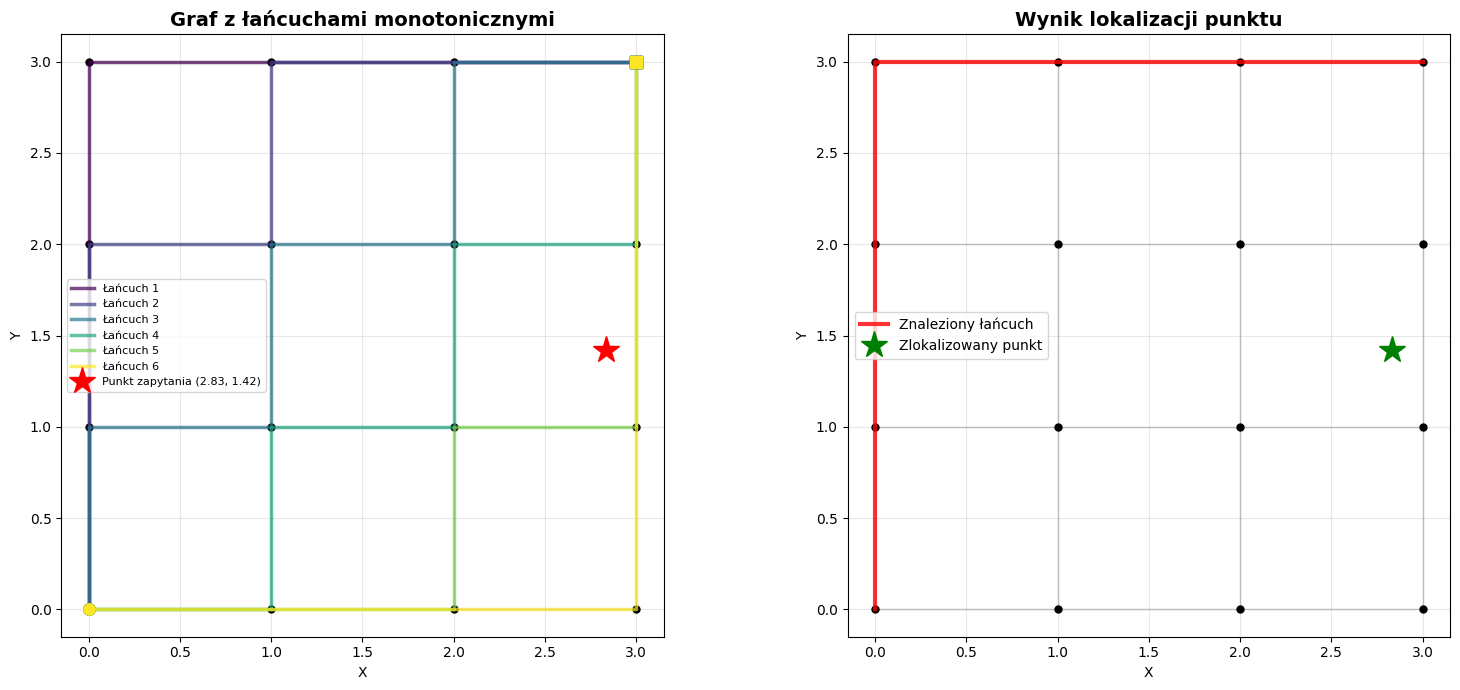

  -> Punkt 02: (1.94, 0.81)


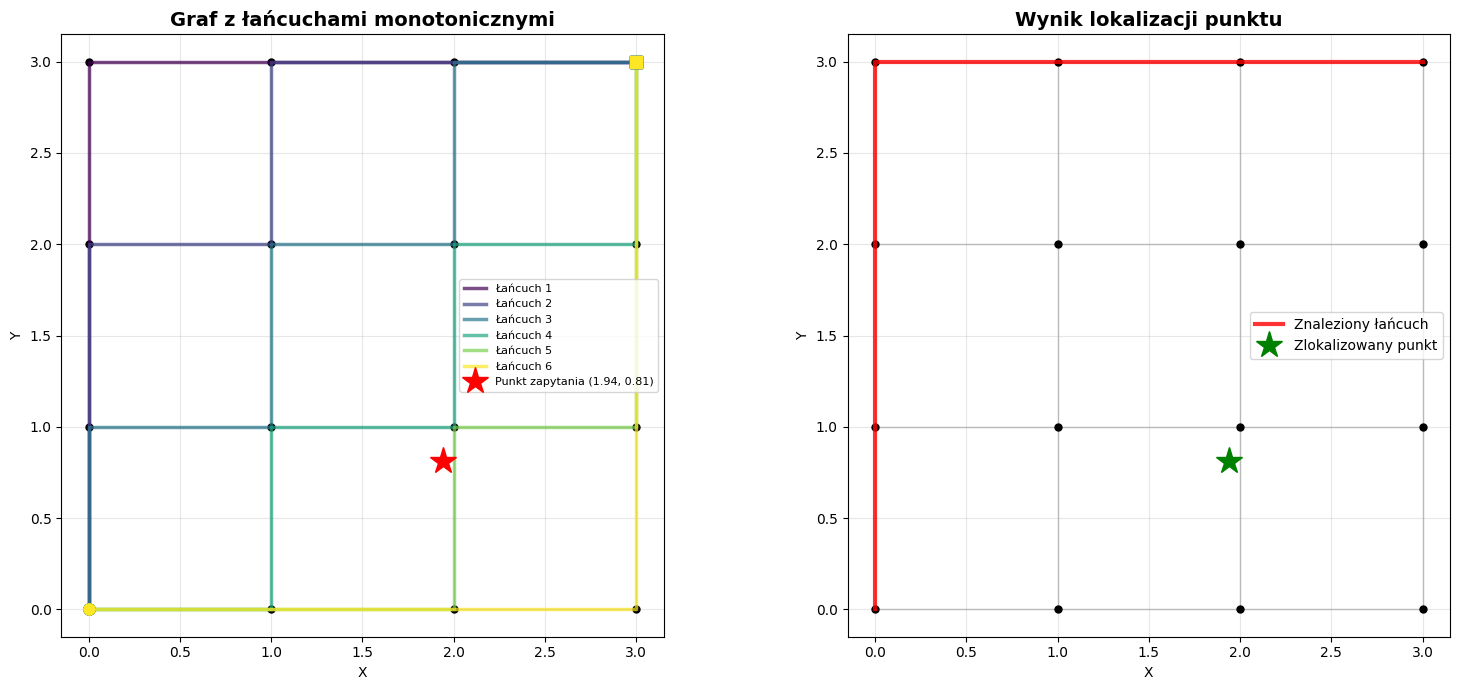

  -> Punkt 03: (1.46, 1.31)


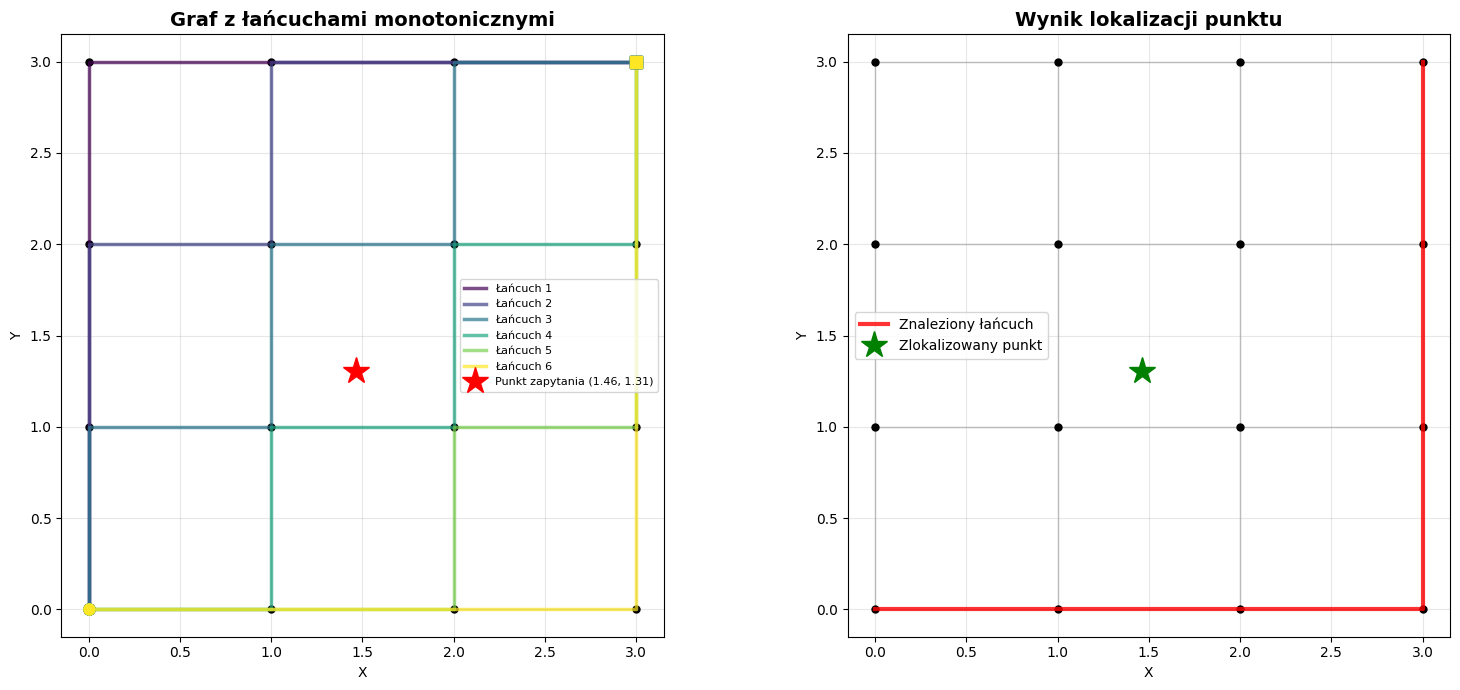

  -> Punkt 04: (0.56, 0.96)


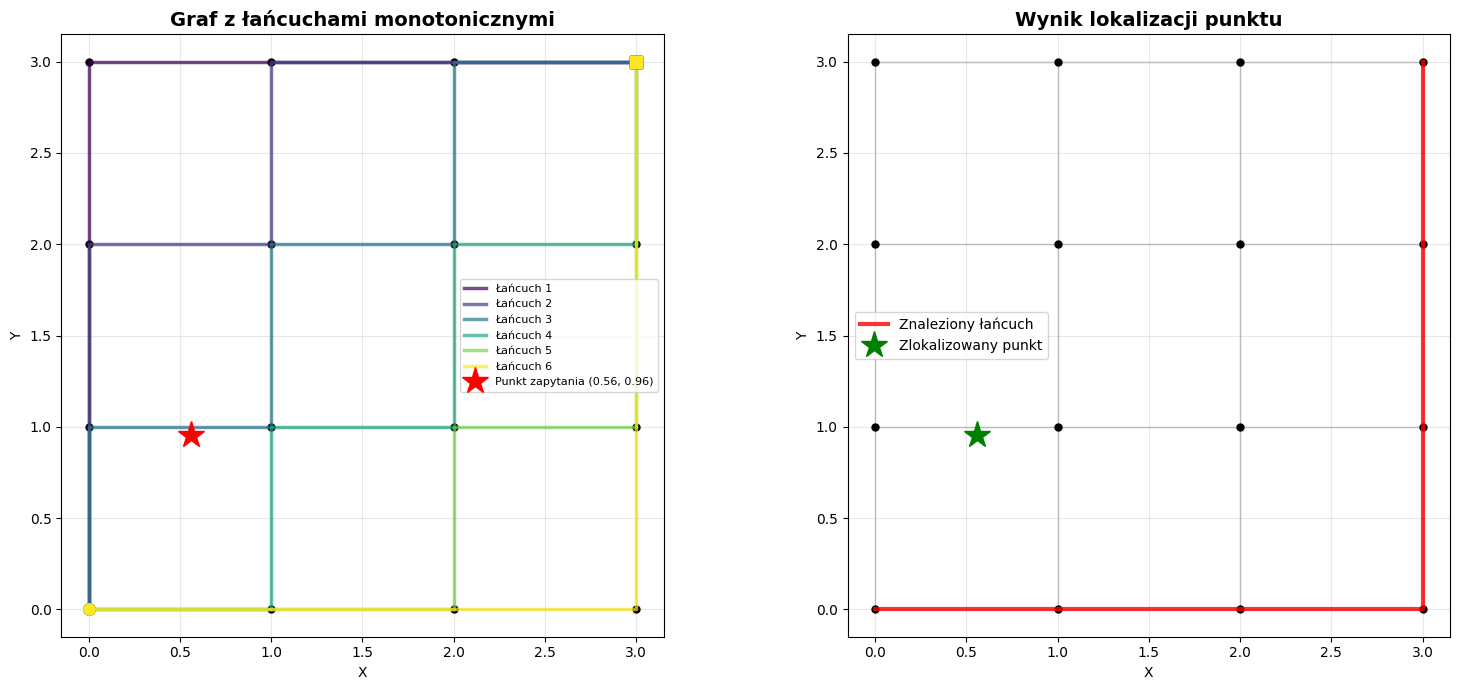

  -> Punkt 05: (1.58, 1.00)


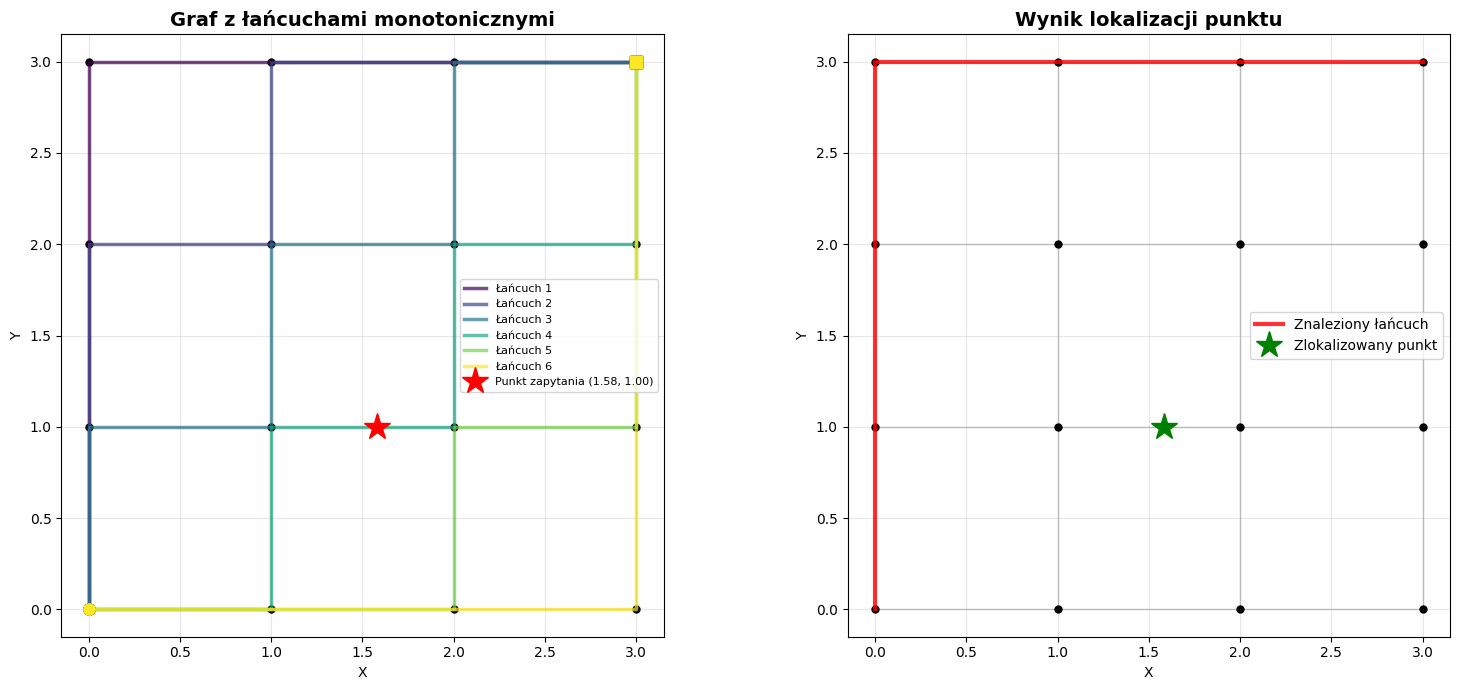

  -> Punkt 06: (2.78, 1.36)


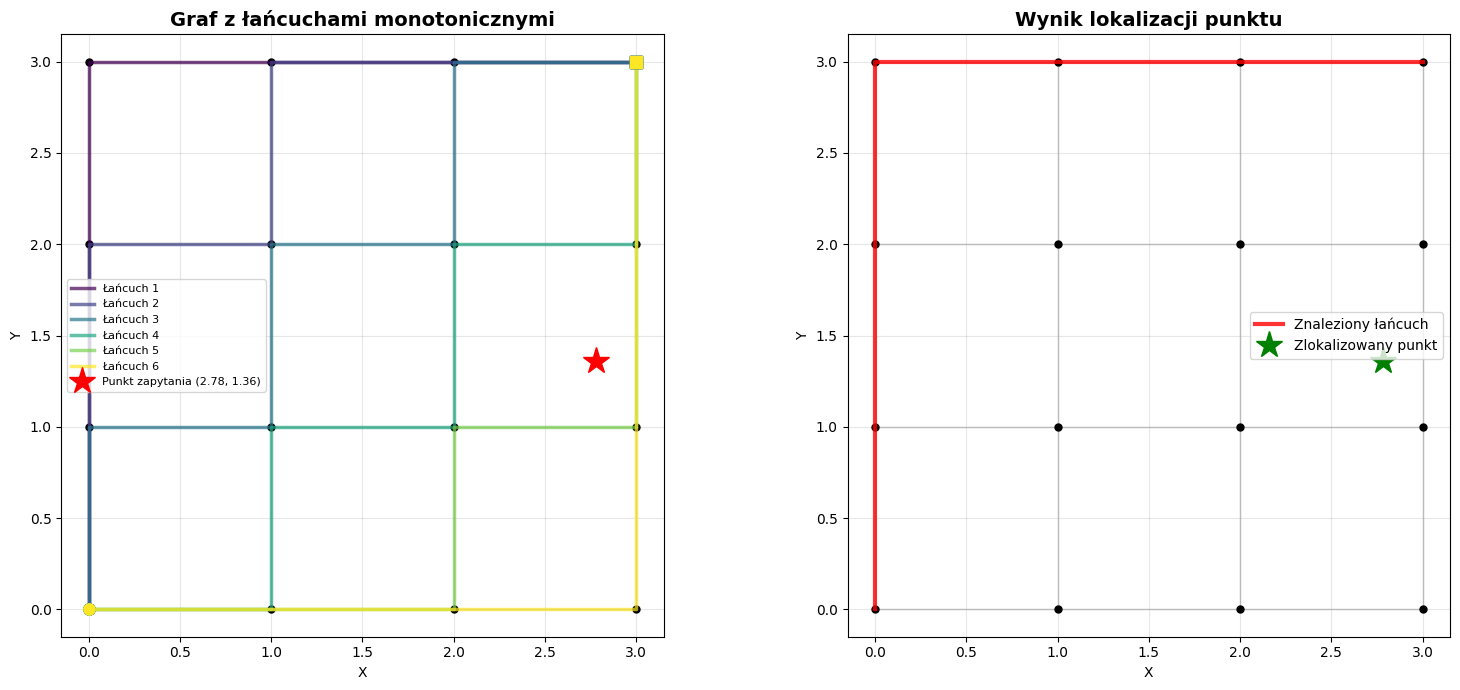

  -> Punkt 07: (1.25, 2.02)


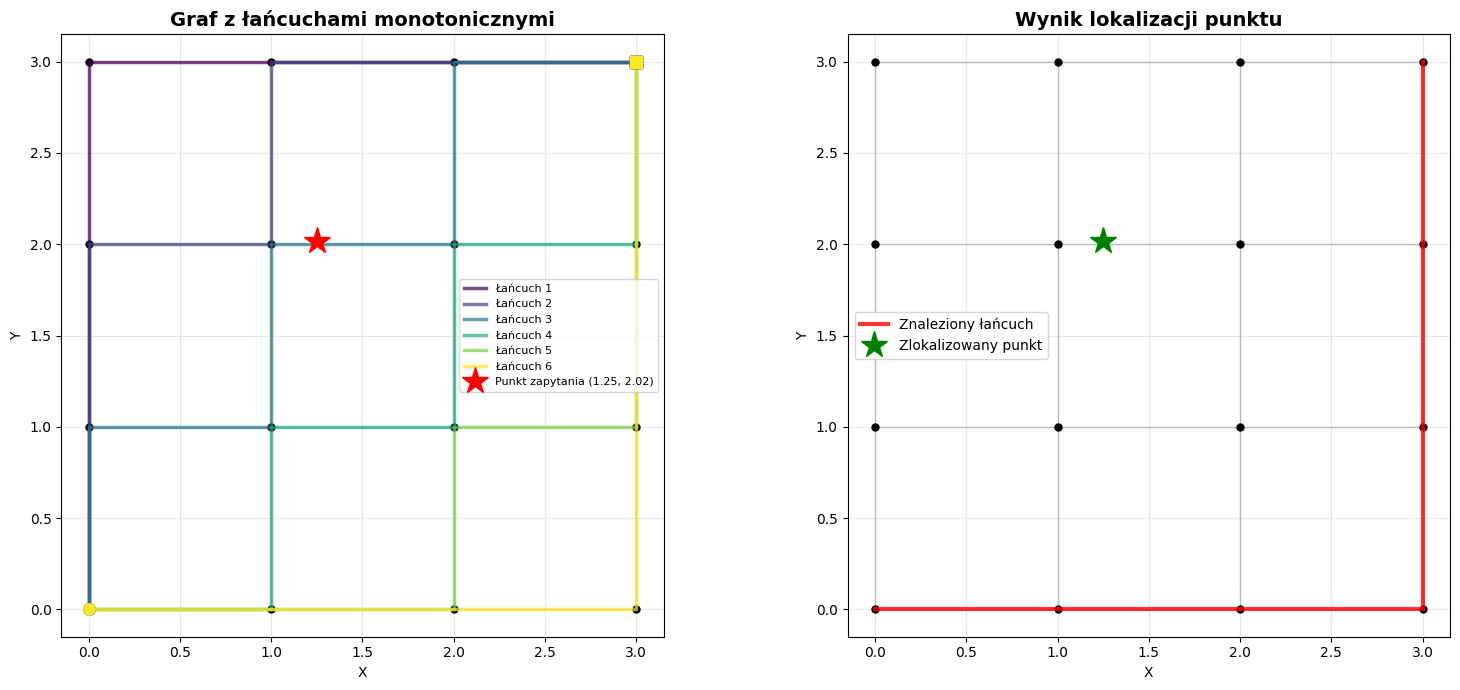

  -> Punkt 08: (0.38, 2.58)


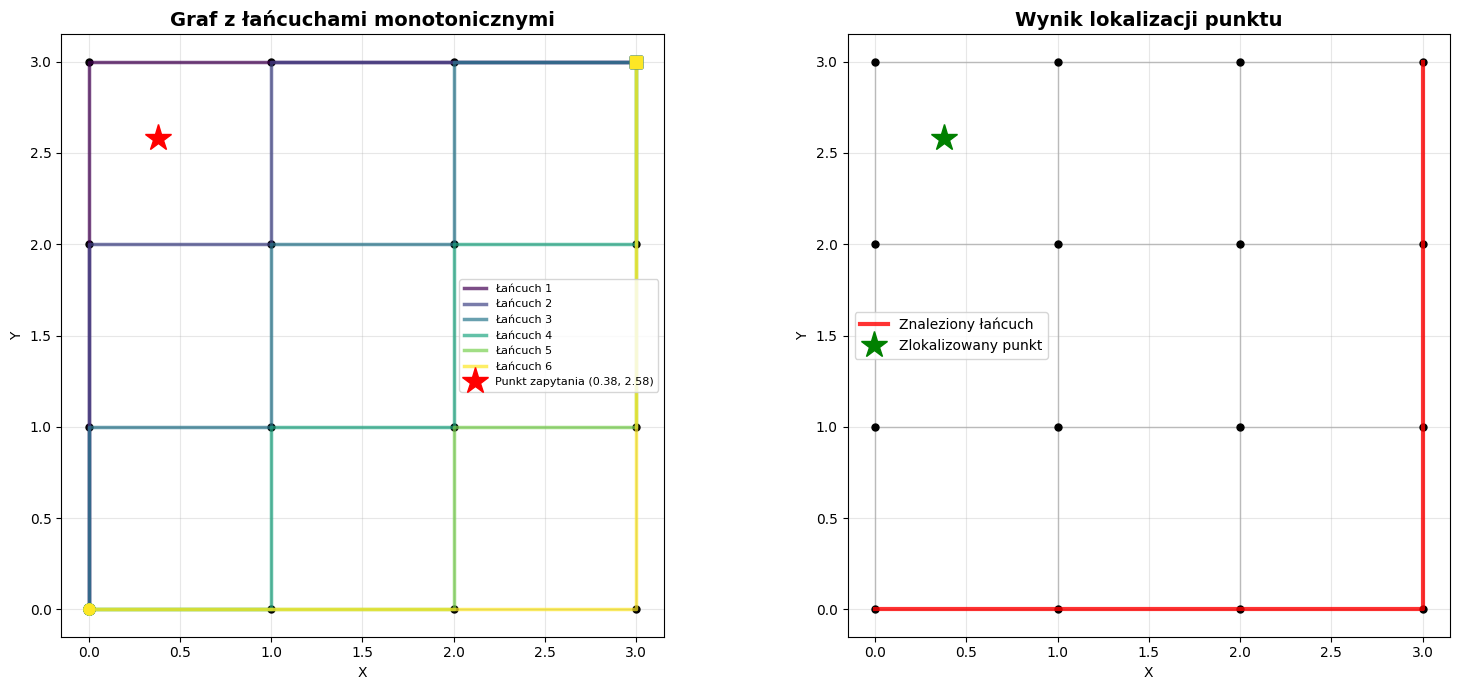

  -> Punkt 09: (0.83, 0.46)


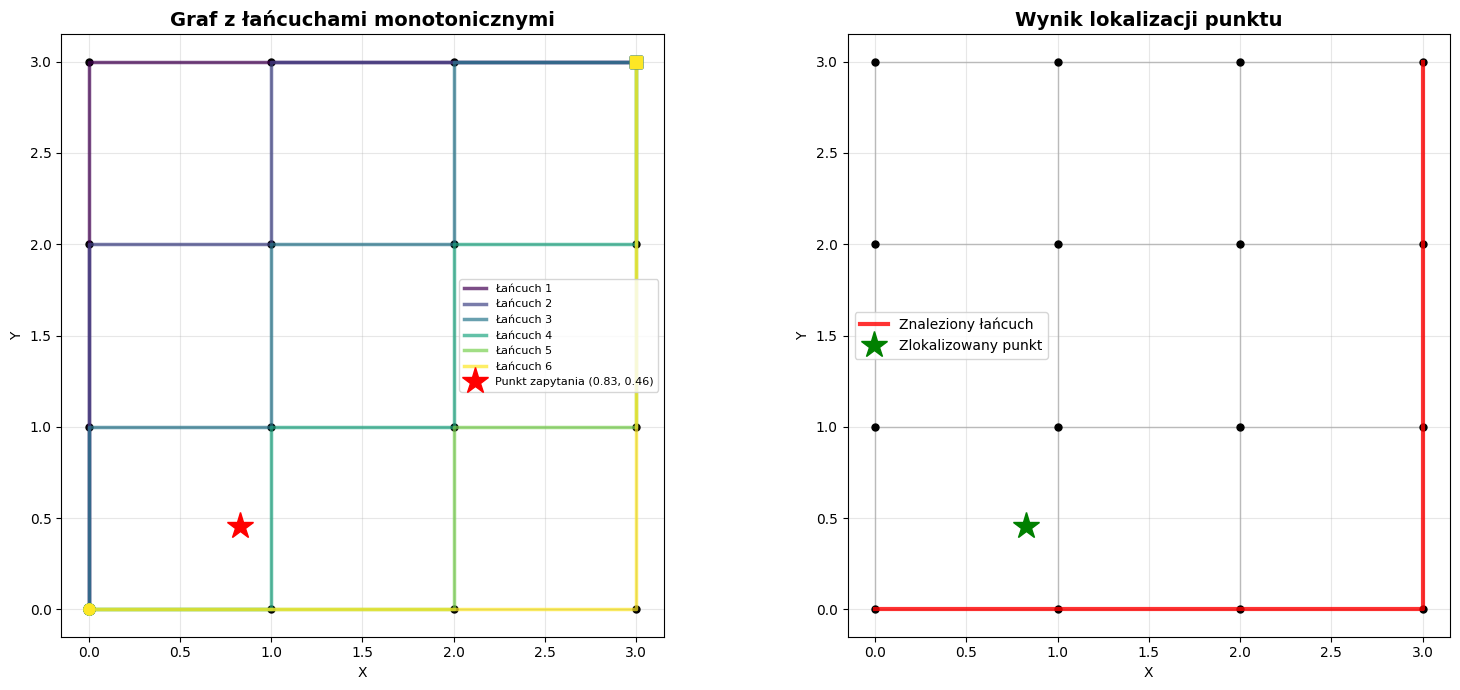

  -> Punkt 10: (1.39, 0.42)


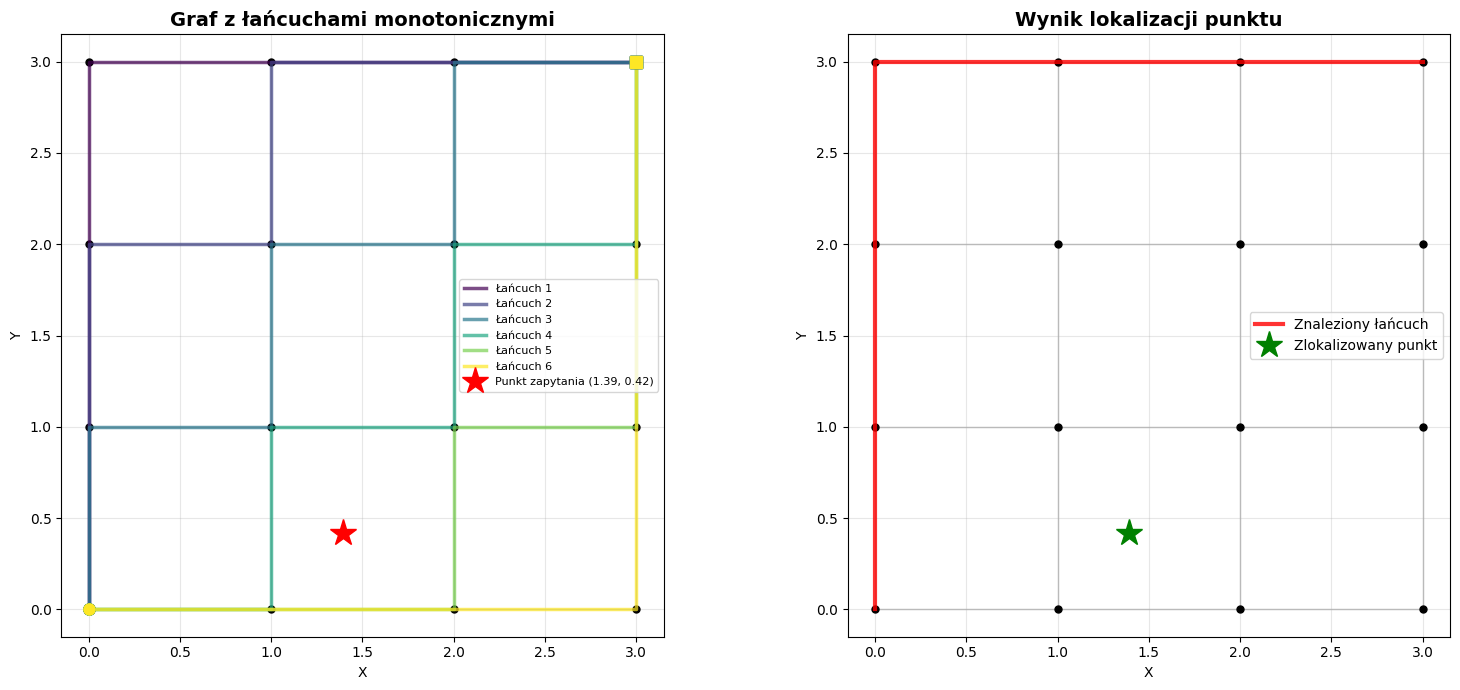


SCENARIUSZ 2: Siatka 4x2 (Równoległoboki)
  -> Punkt 01: (3.08, 1.71)


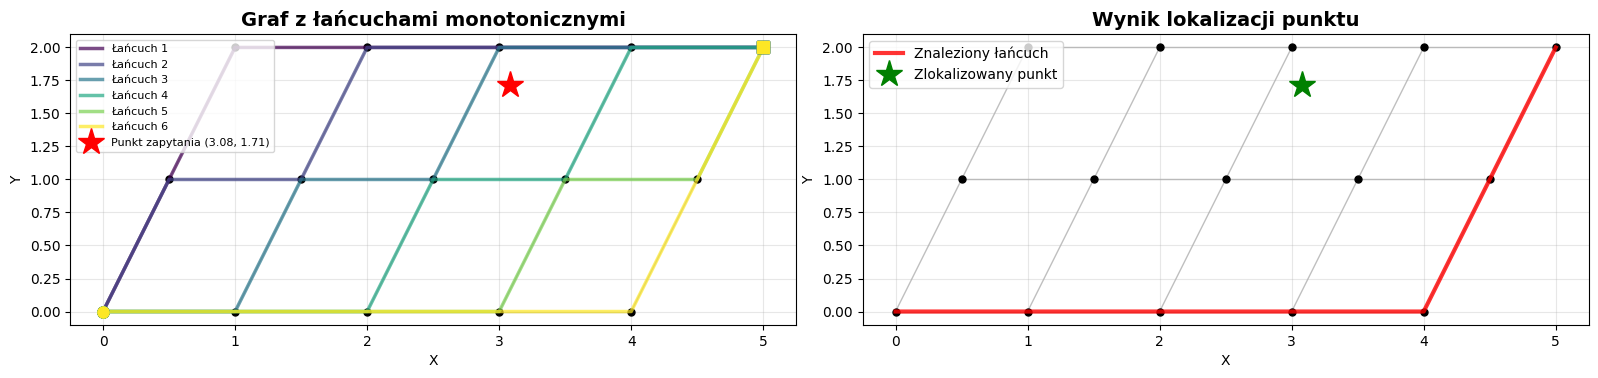

  -> Punkt 02: (2.42, 0.16)


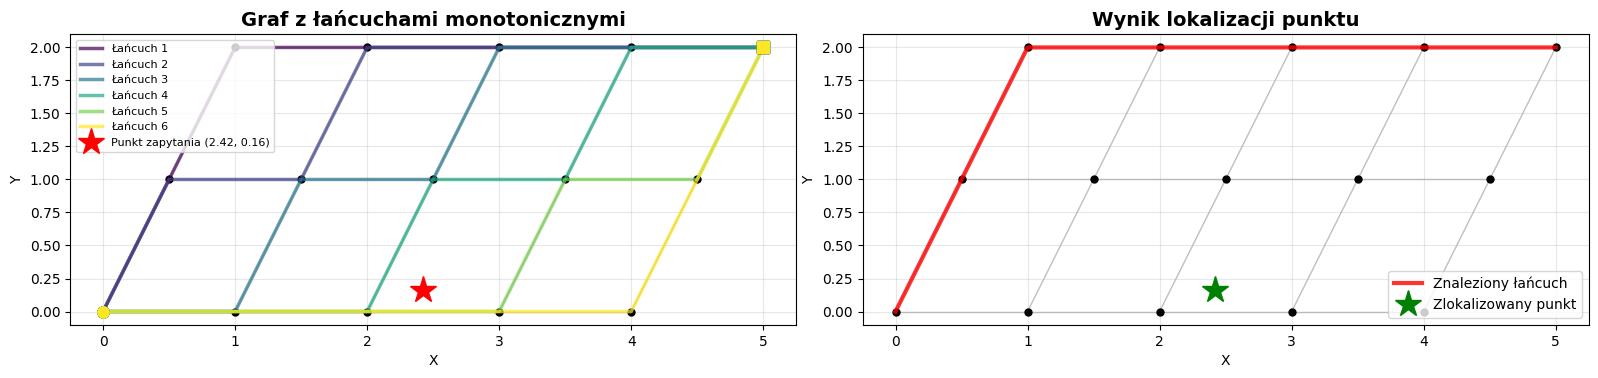

  -> Punkt 03: (2.61, 0.30)


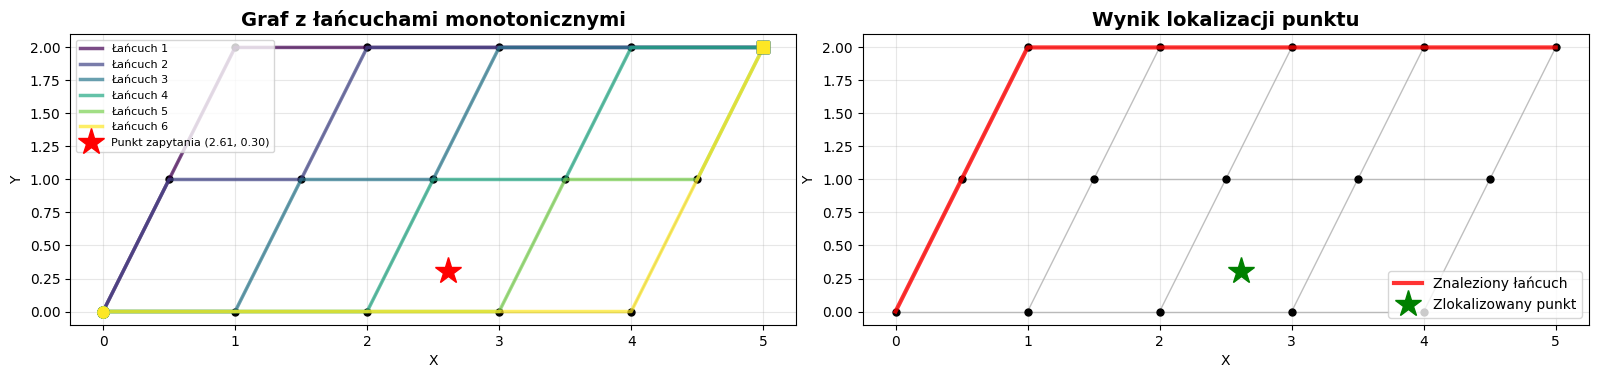

  -> Punkt 04: (1.50, 1.45)


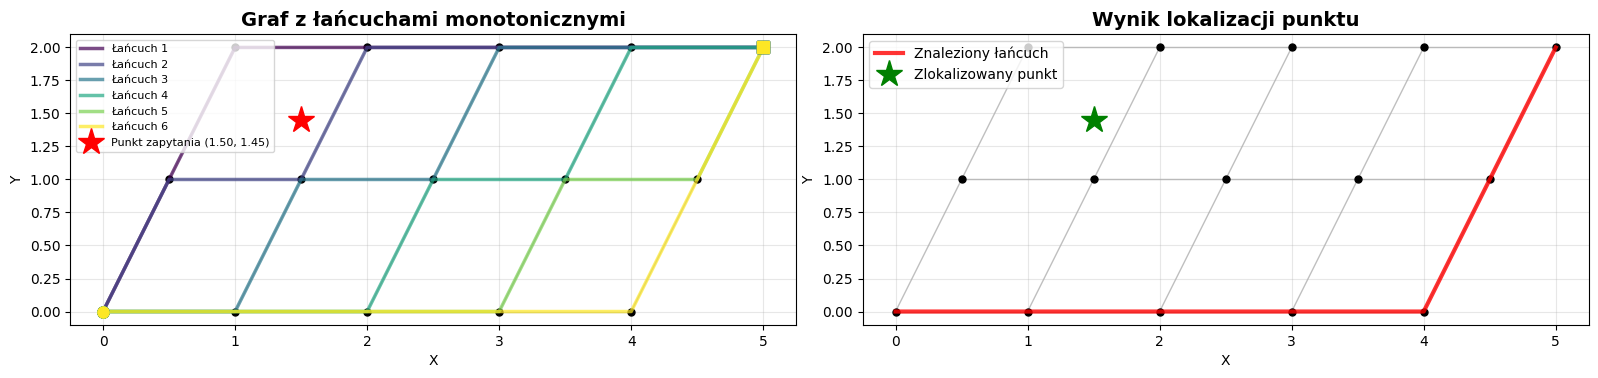

  -> Punkt 05: (2.53, 1.40)


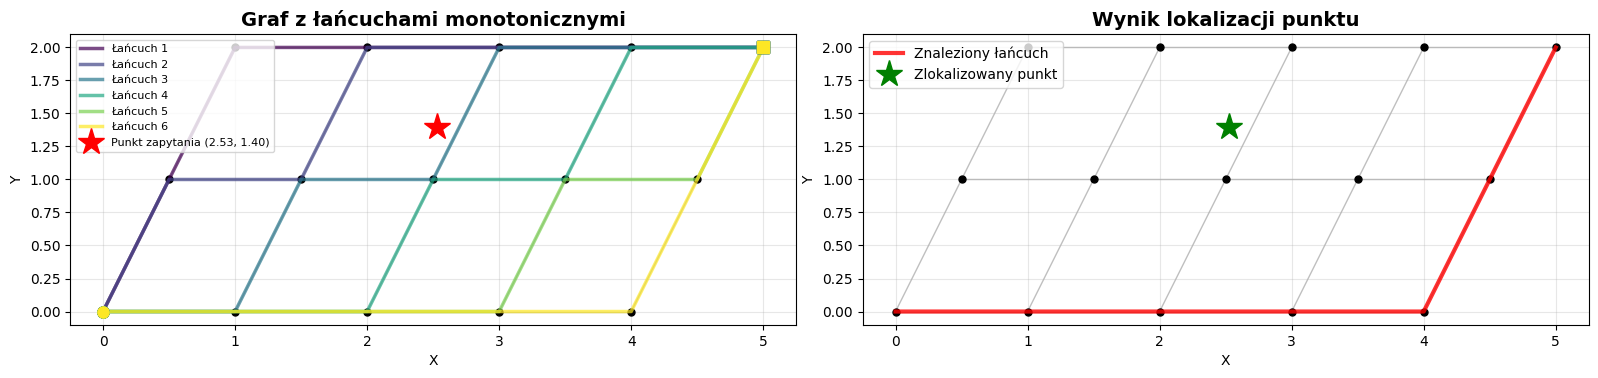

  -> Punkt 06: (4.20, 0.54)


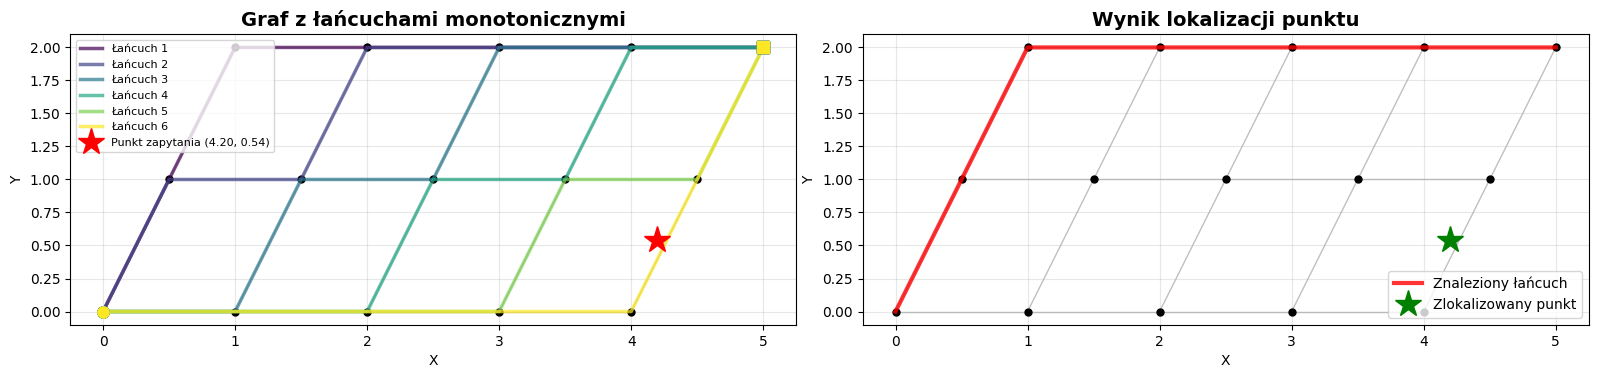

  -> Punkt 07: (3.10, 1.90)


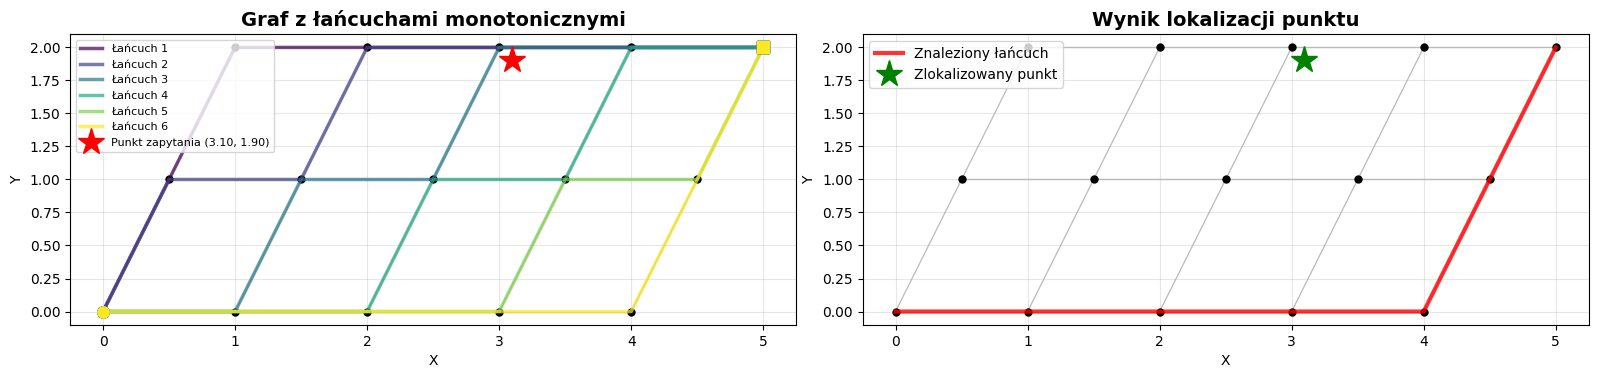

  -> Punkt 08: (0.20, 0.16)


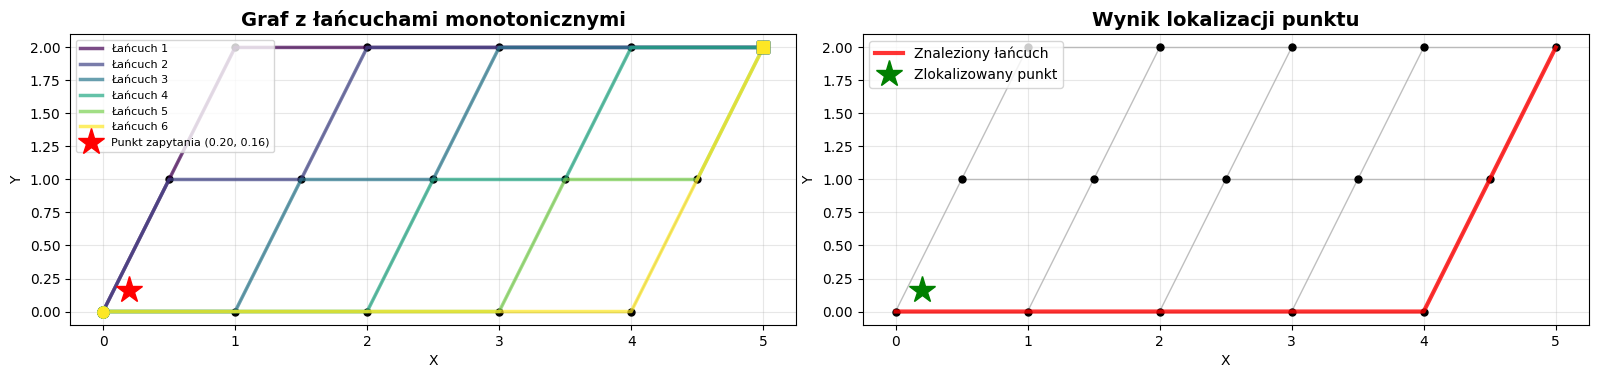

  -> Punkt 09: (3.71, 1.09)


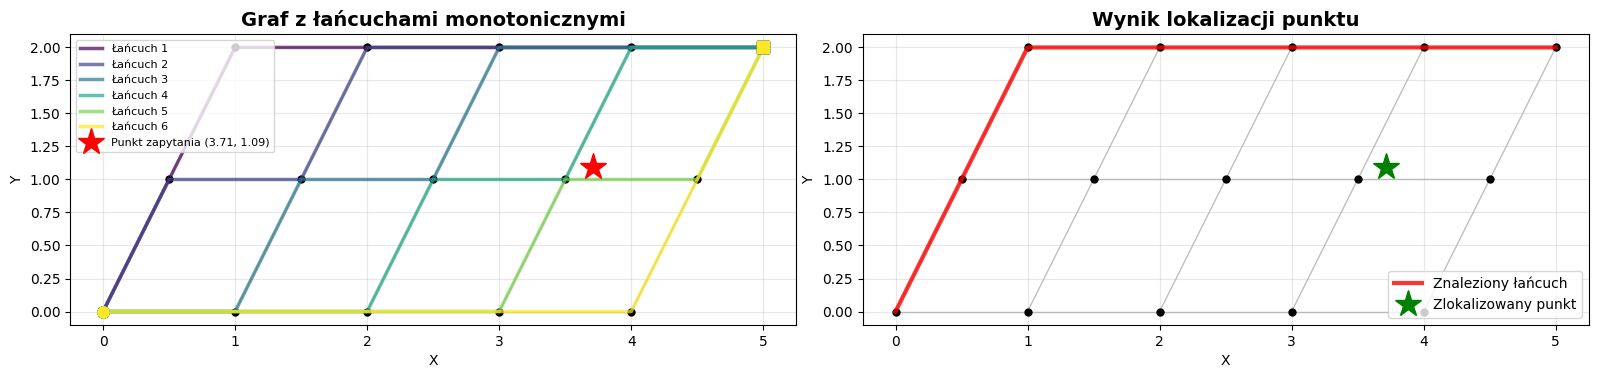

  -> Punkt 10: (4.16, 1.88)


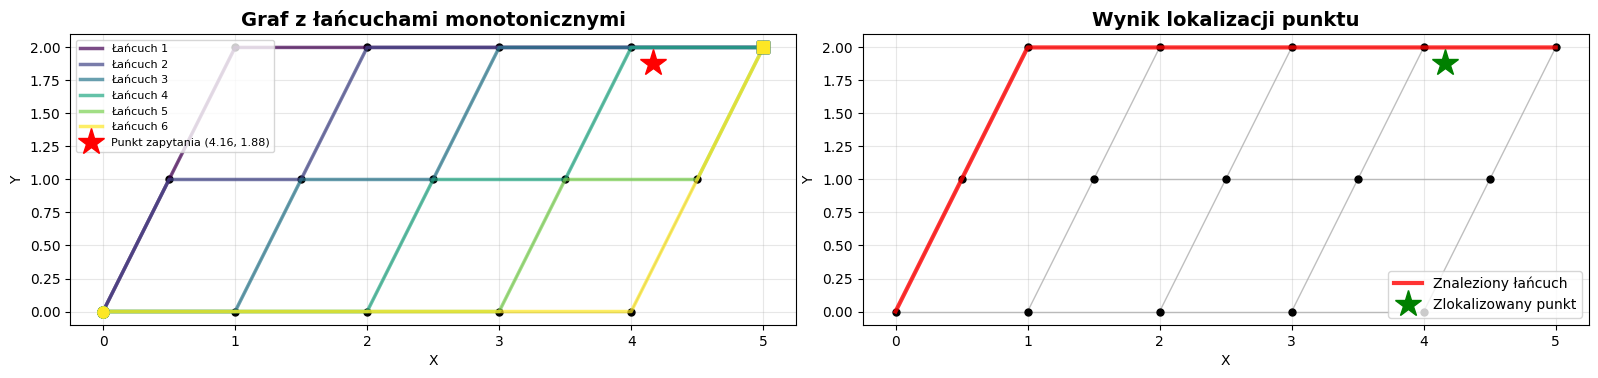


SCENARIUSZ 3: Siatka 2x5 (Trójkąty)
  -> Punkt 01: (1.85, 1.39)


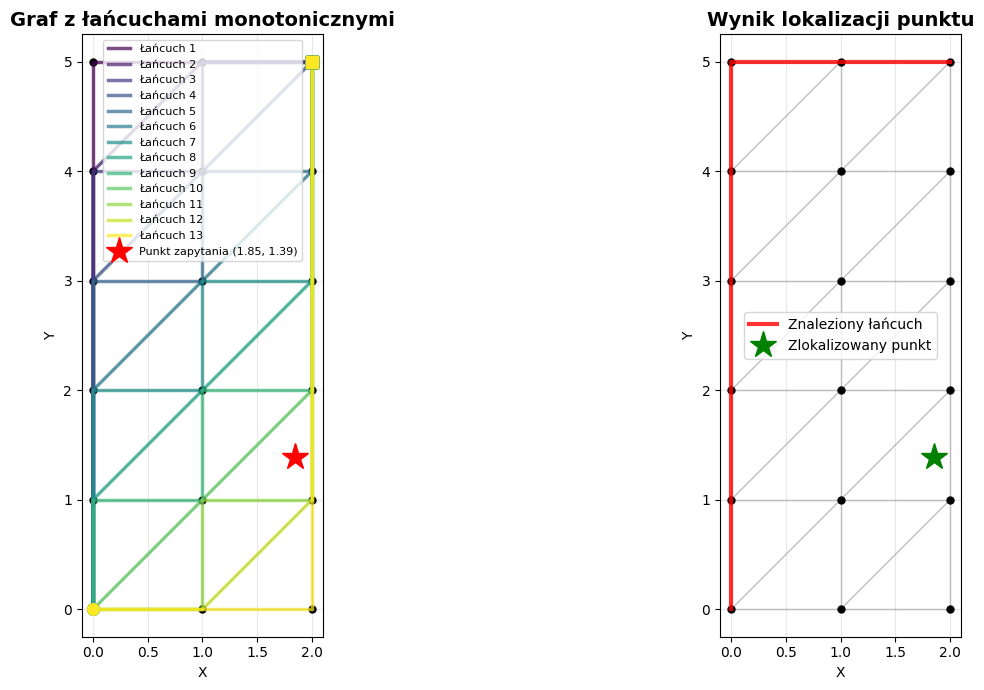

  -> Punkt 02: (1.06, 2.17)


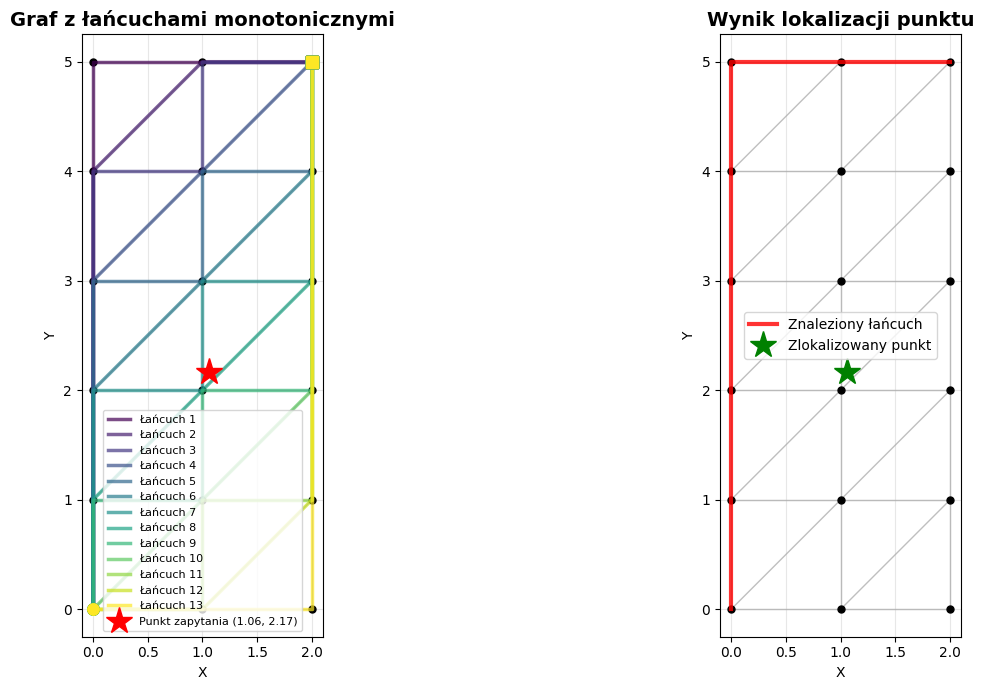

  -> Punkt 03: (1.61, 1.14)


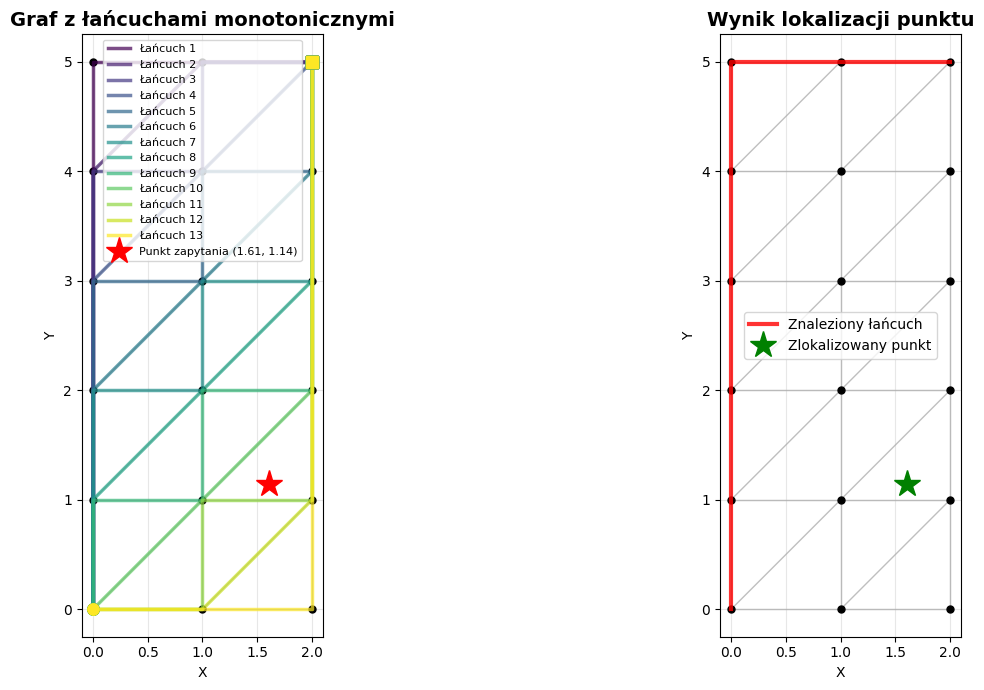

  -> Punkt 04: (0.32, 4.31)


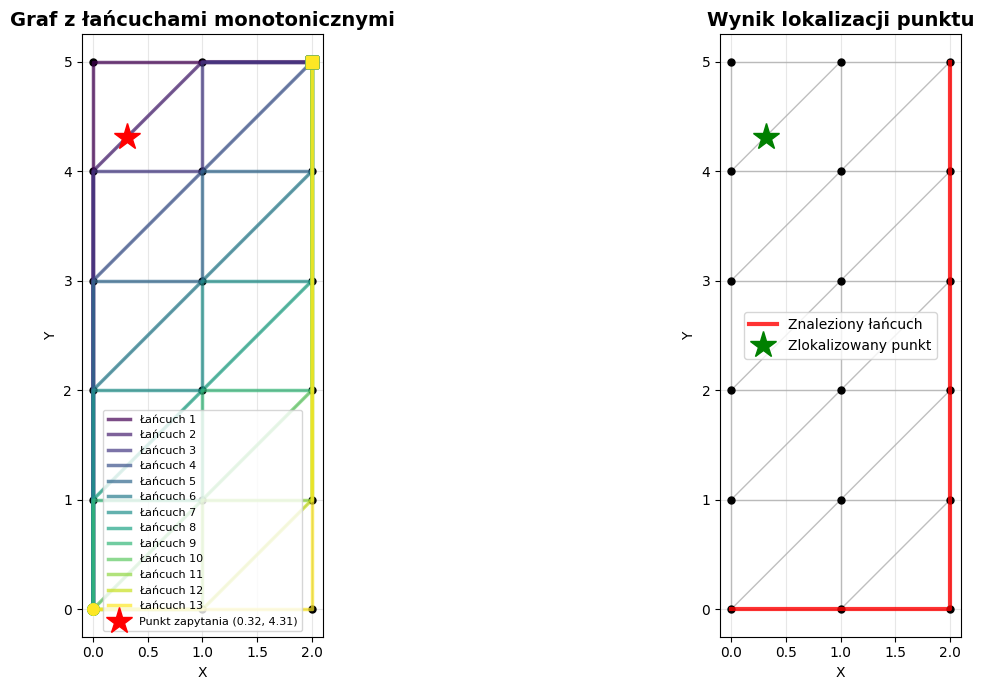

  -> Punkt 05: (1.69, 1.69)


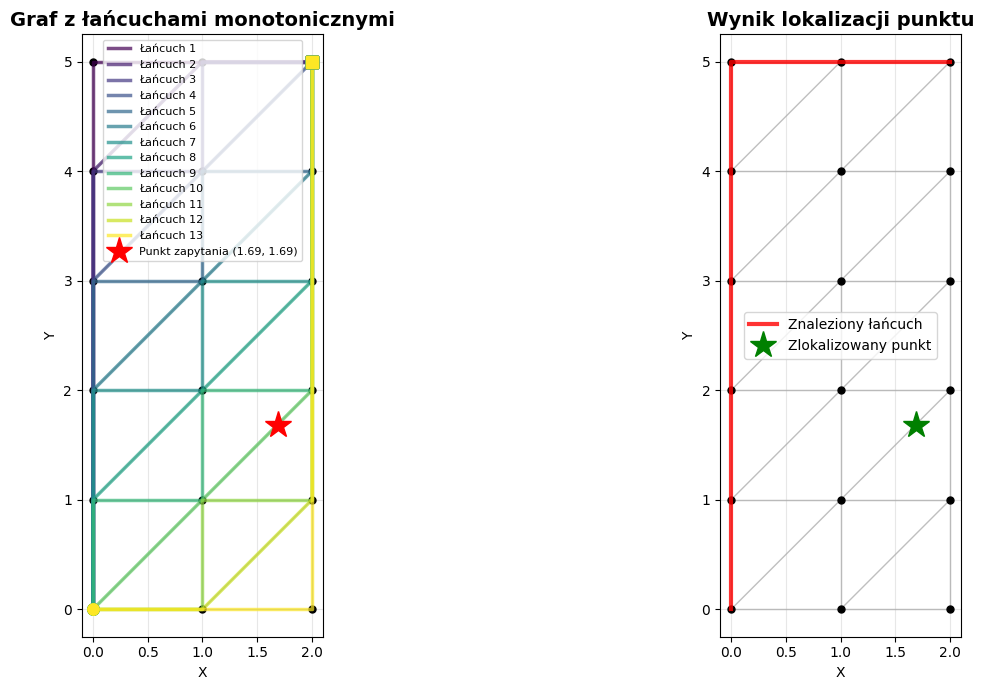

  -> Punkt 06: (1.79, 4.35)


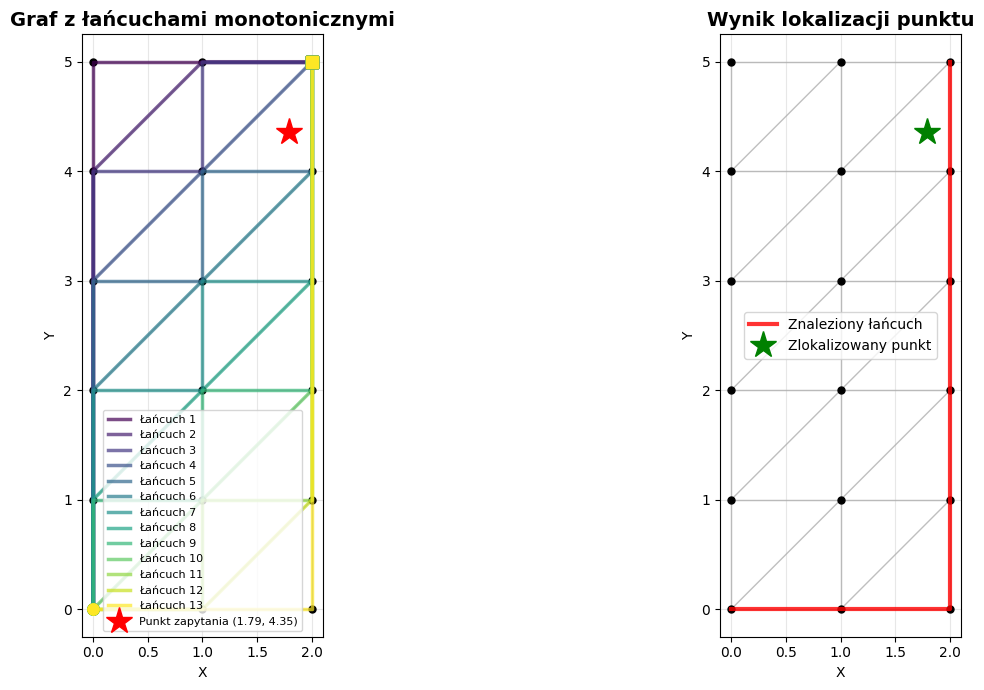

  -> Punkt 07: (0.77, 1.50)


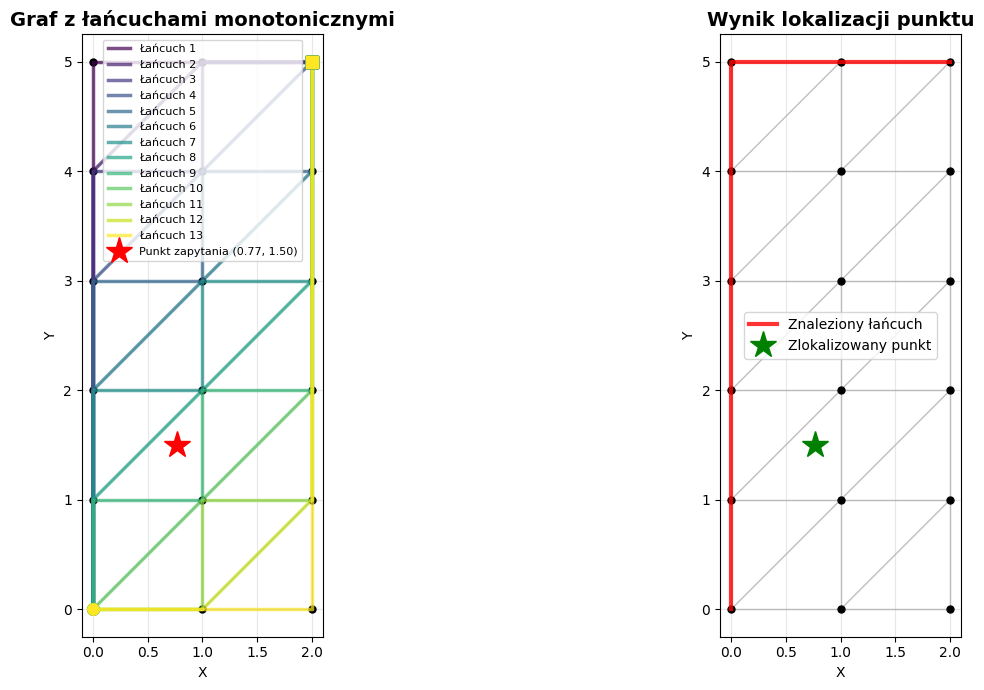

  -> Punkt 08: (0.27, 1.18)


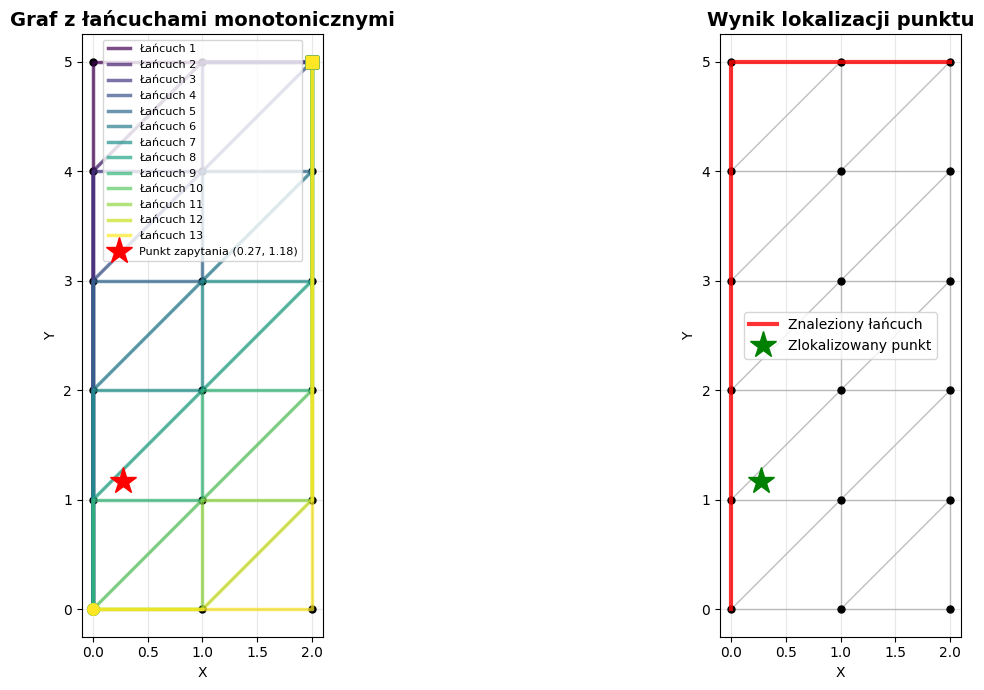

  -> Punkt 09: (1.80, 1.59)


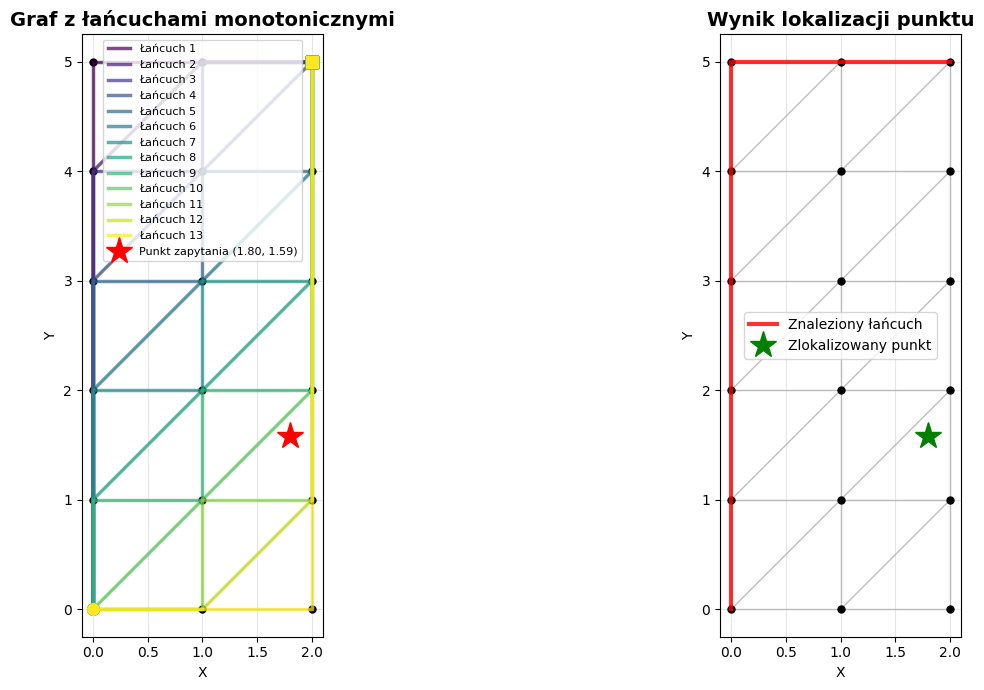

  -> Punkt 10: (1.76, 2.41)


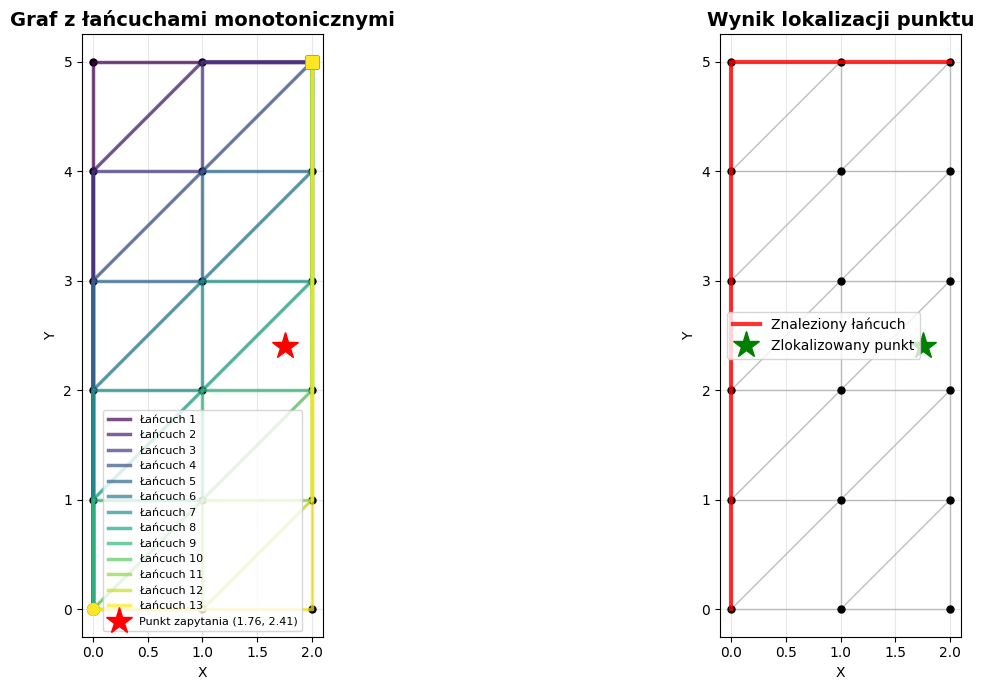


SCENARIUSZ 4: Siatka 5x5 (Trójkąty)
  -> Punkt 01: (0.57, 4.71)


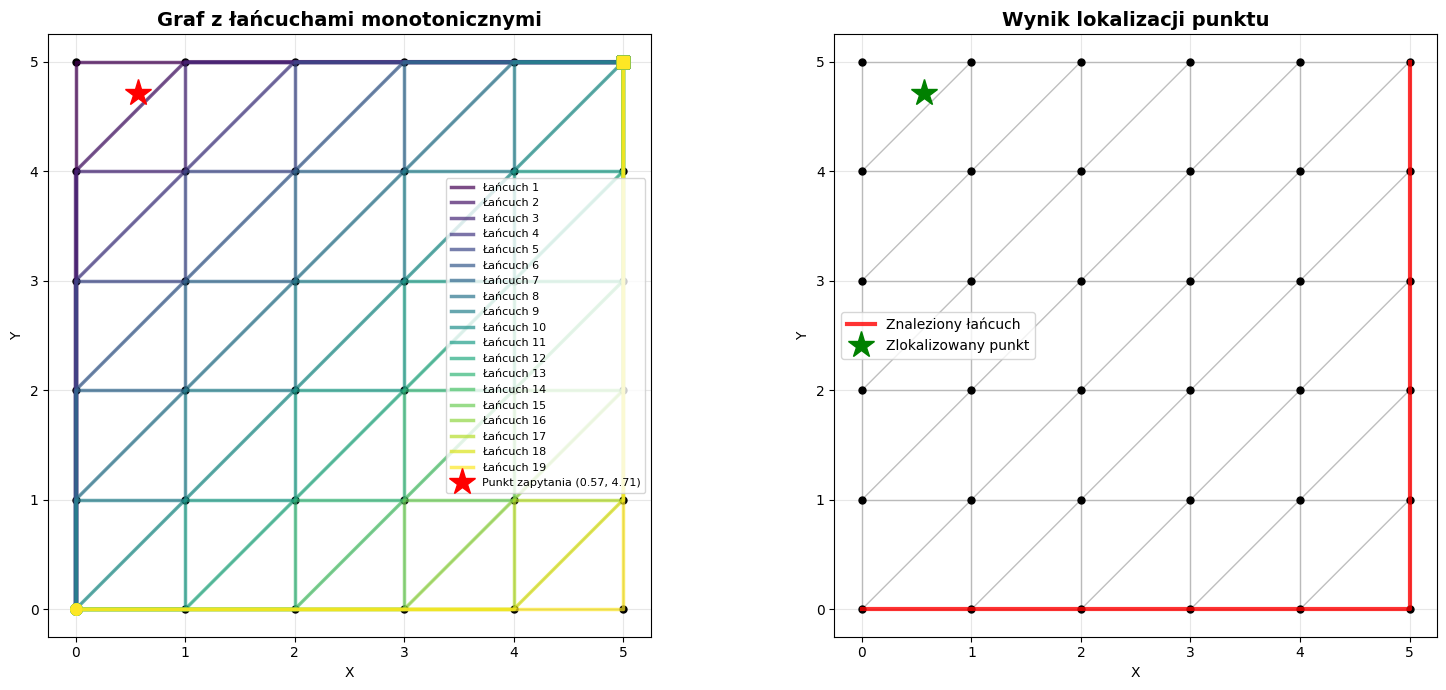

  -> Punkt 02: (4.98, 4.18)


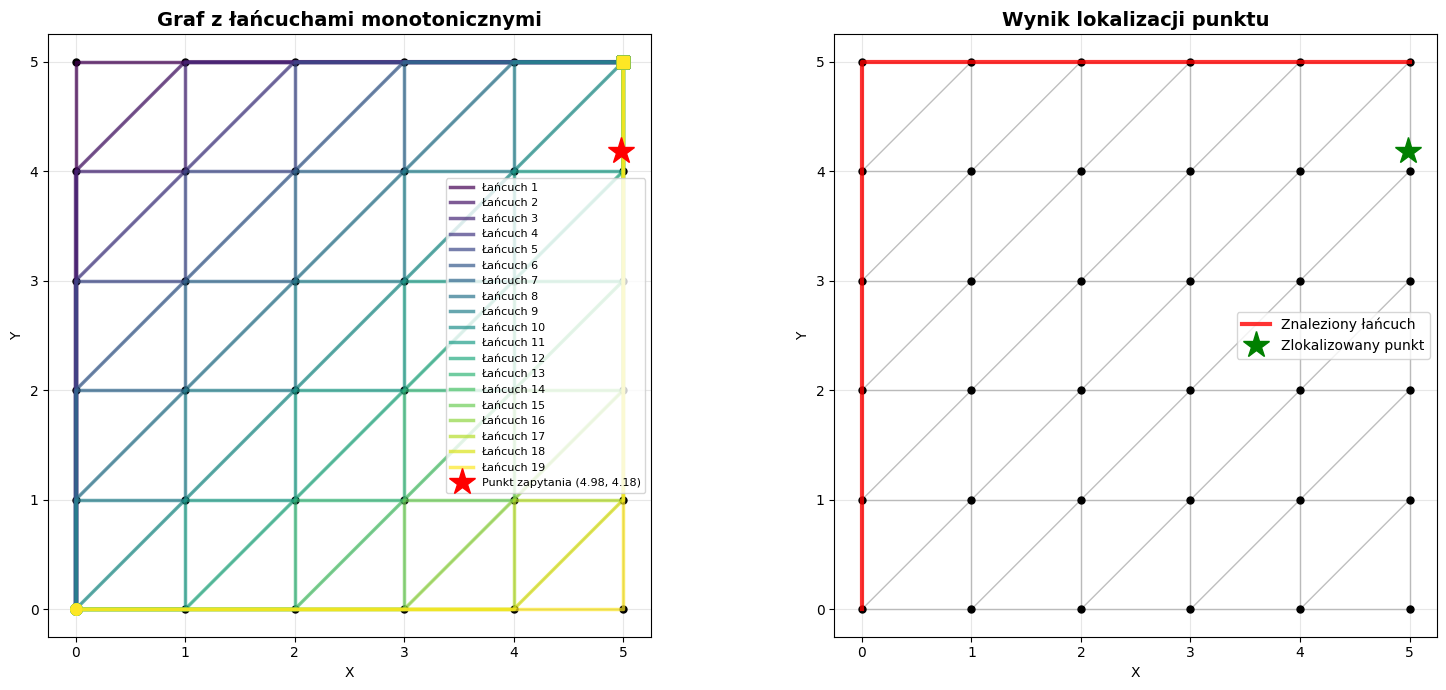

  -> Punkt 03: (3.83, 4.40)


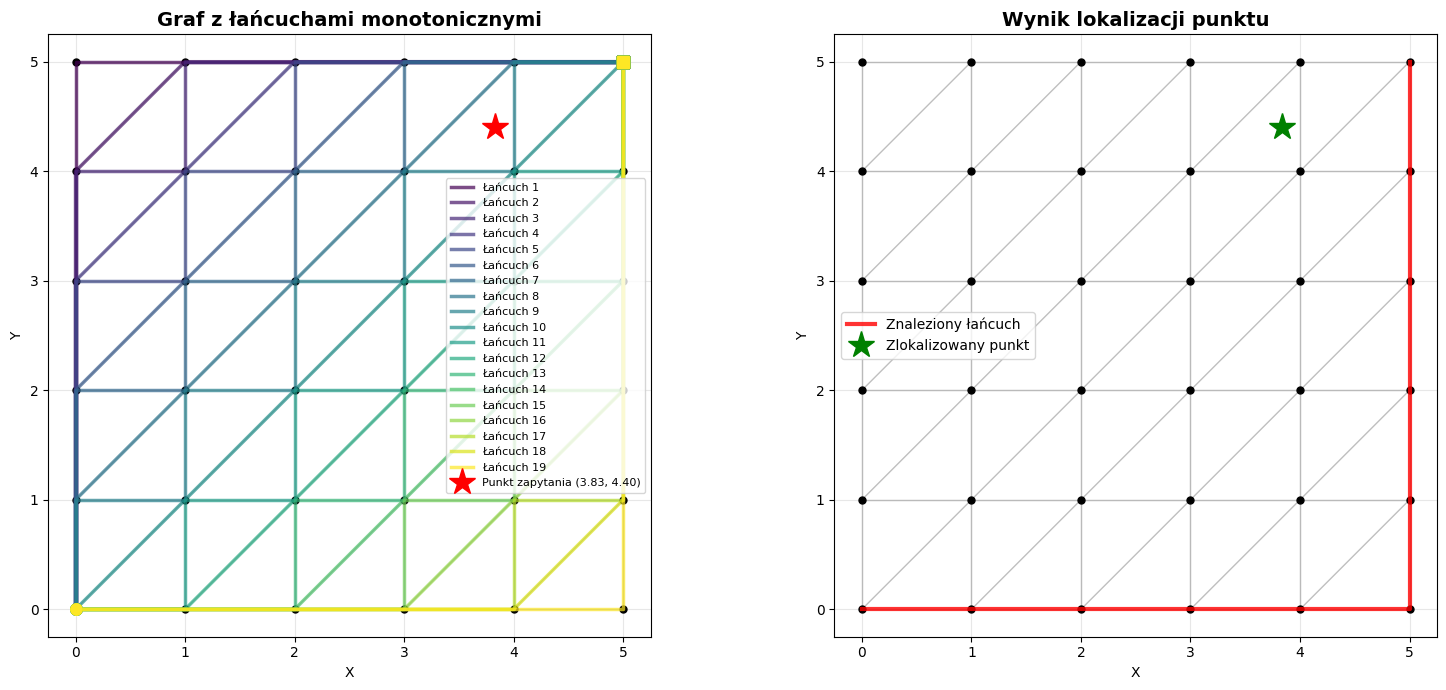

  -> Punkt 04: (1.84, 3.03)


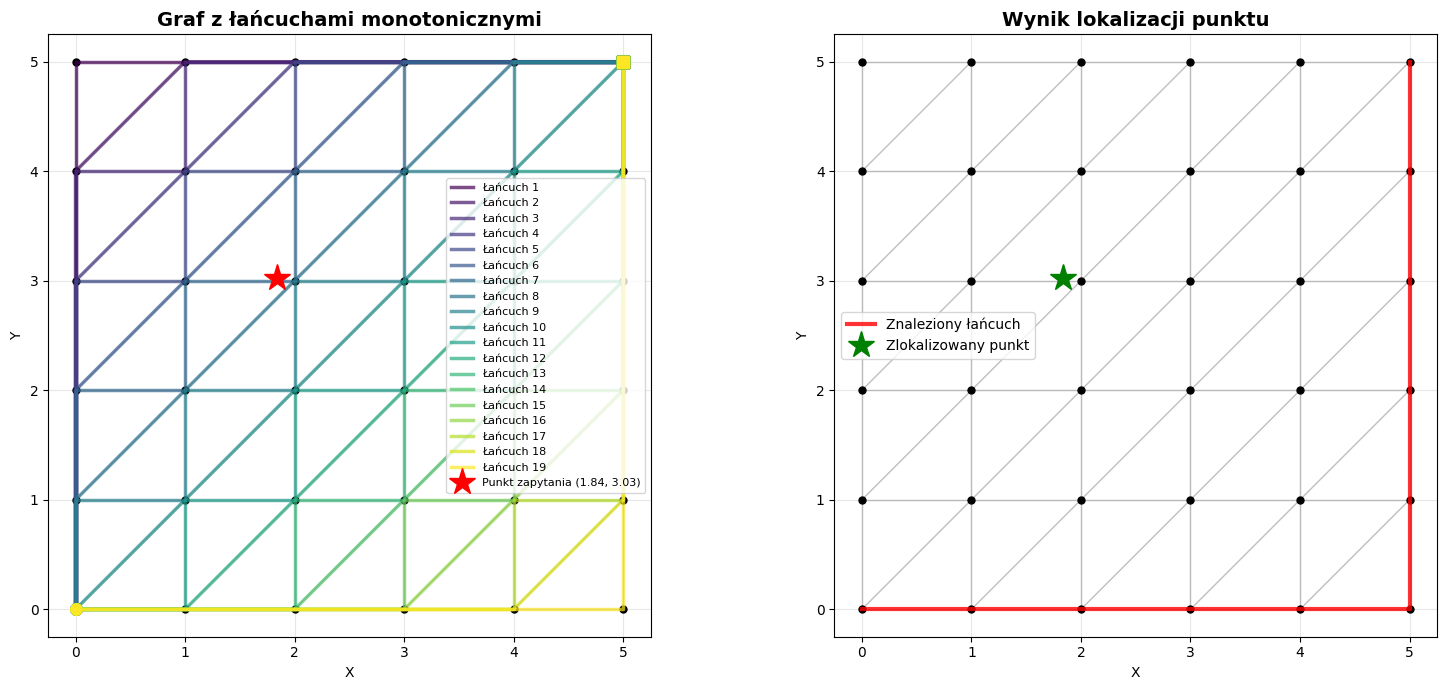

  -> Punkt 05: (3.53, 4.07)


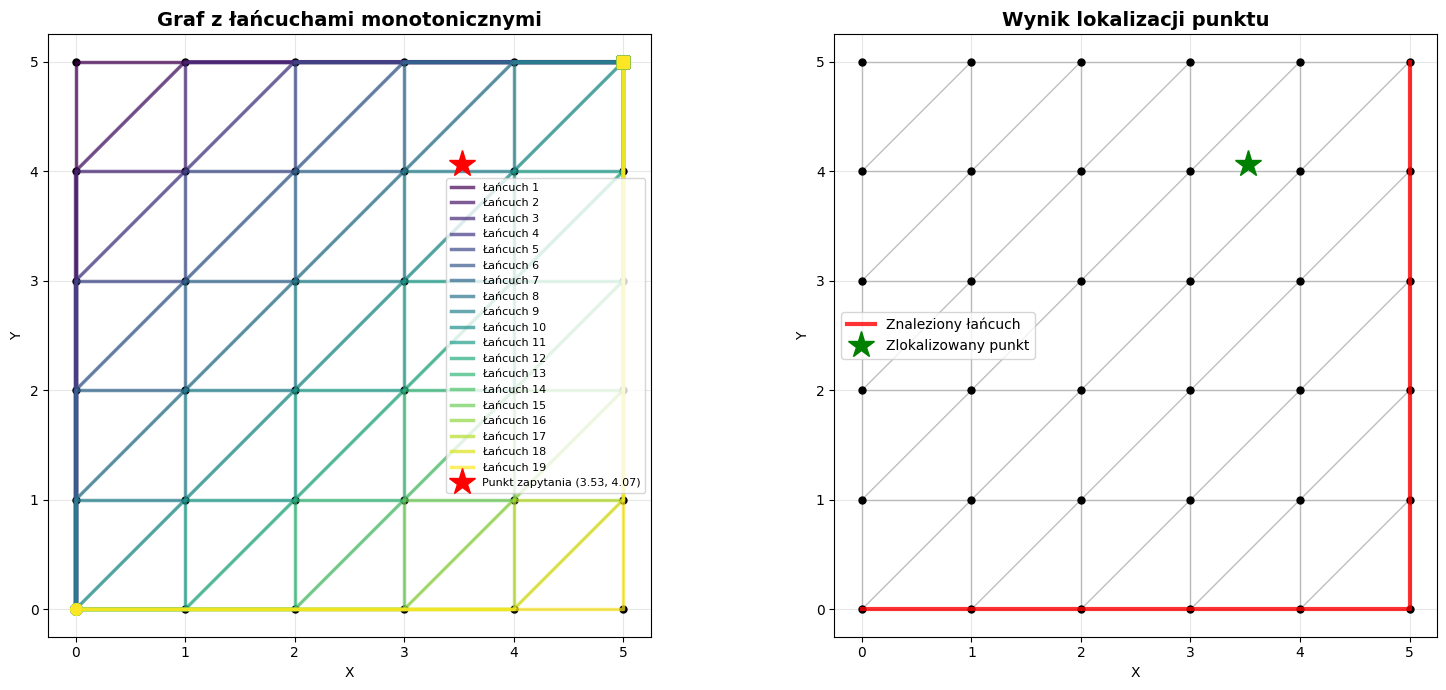

  -> Punkt 06: (2.76, 1.03)


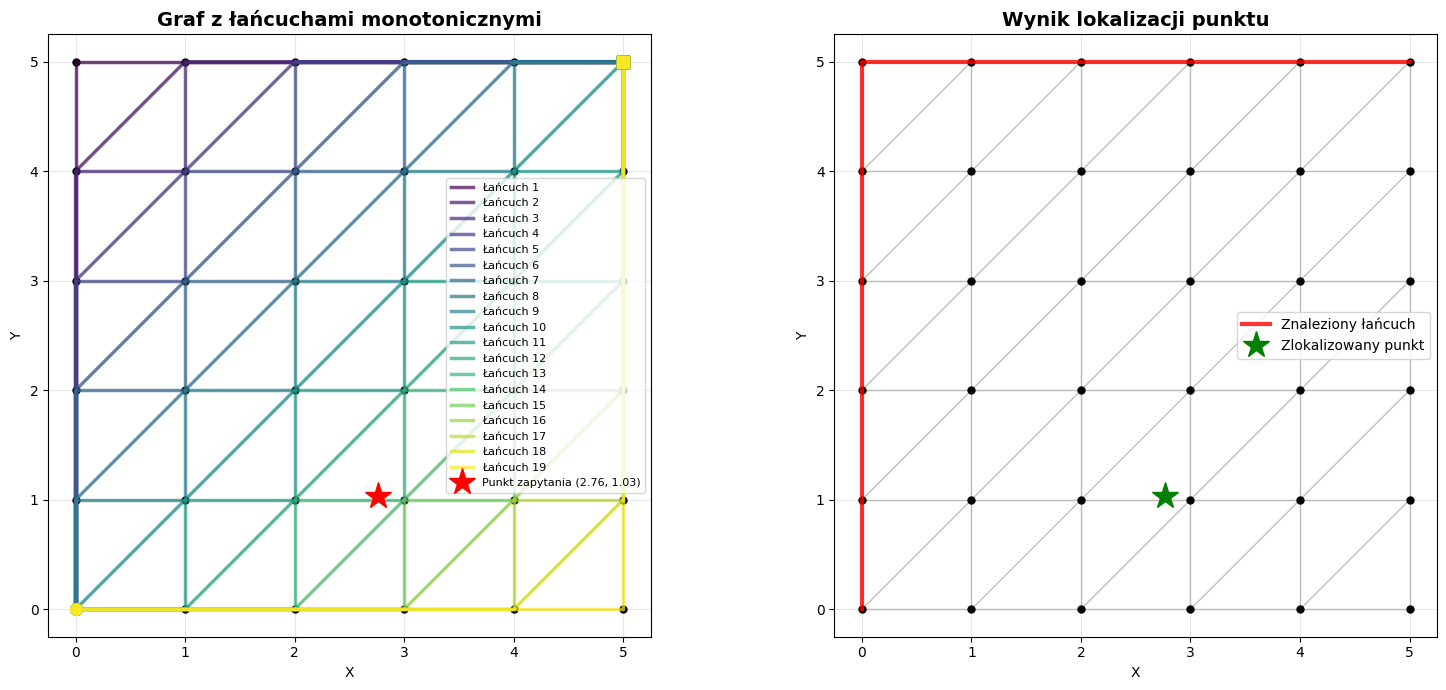

  -> Punkt 07: (4.36, 0.77)


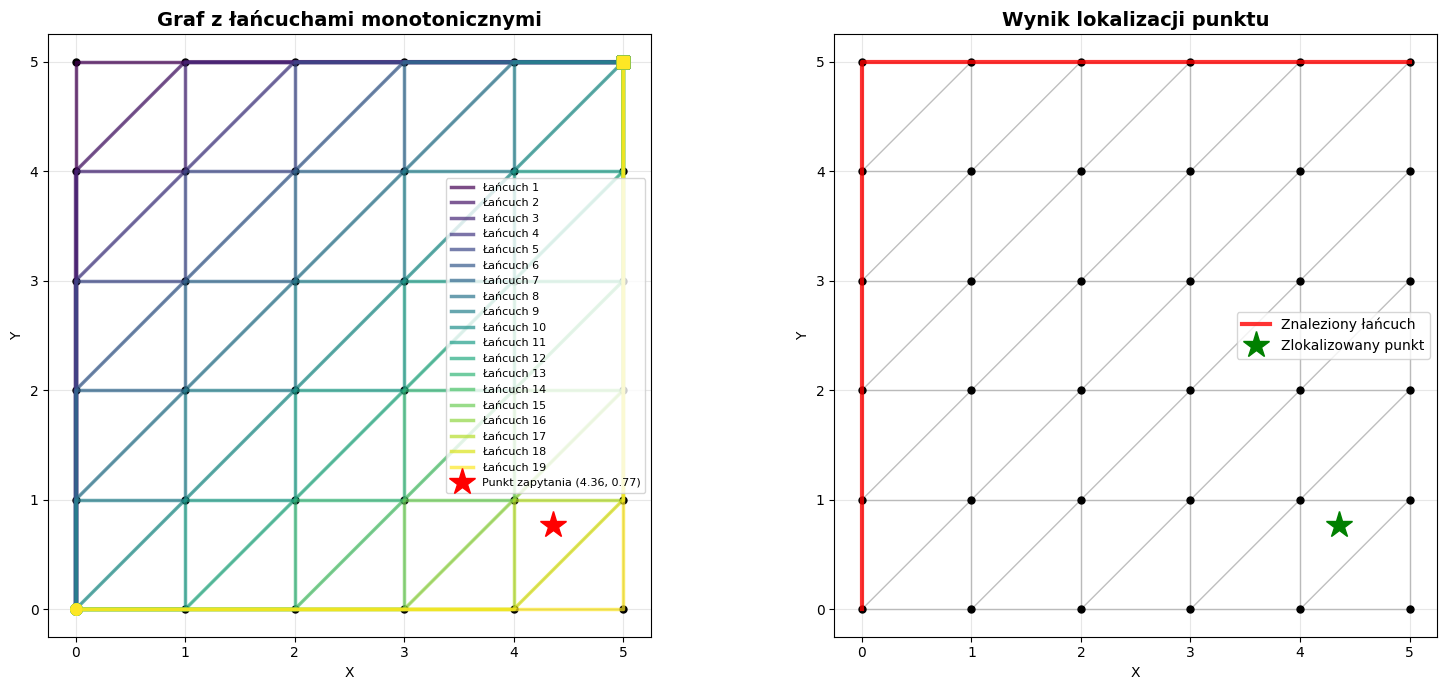

  -> Punkt 08: (0.57, 3.19)


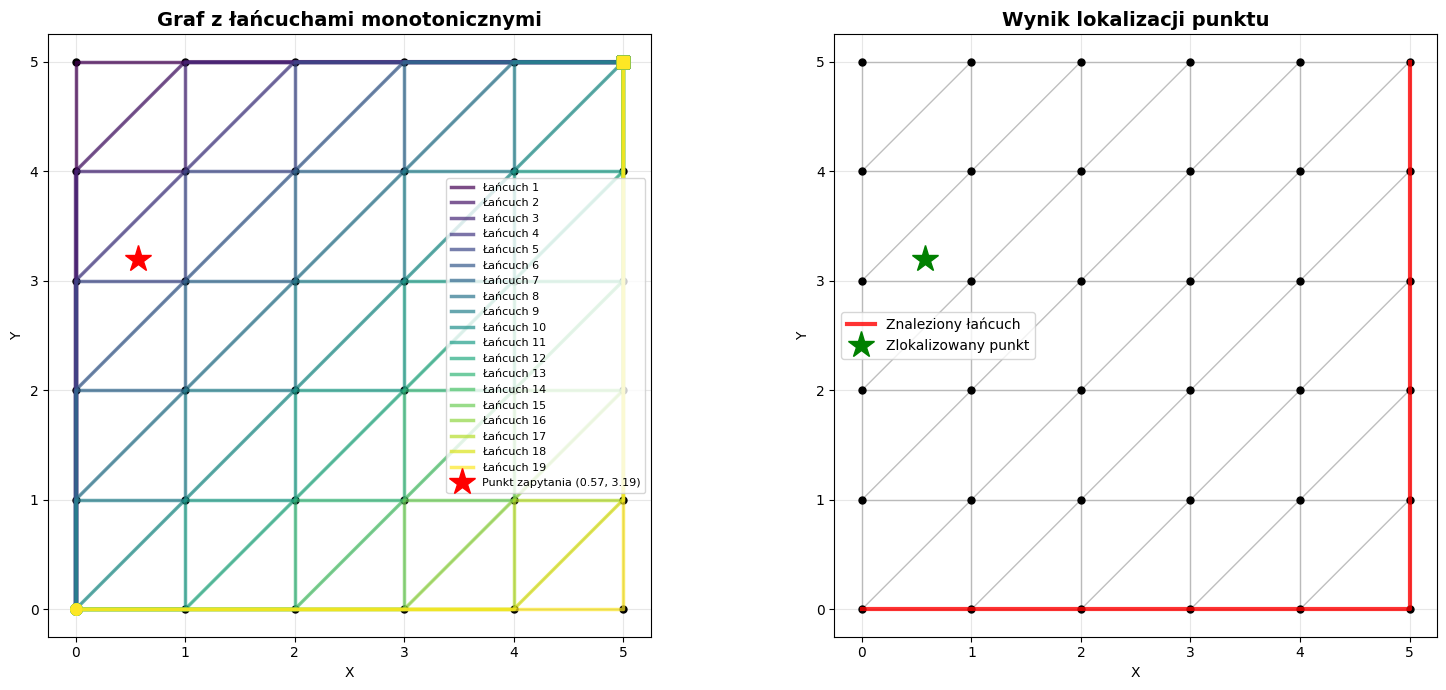

  -> Punkt 09: (4.21, 4.90)


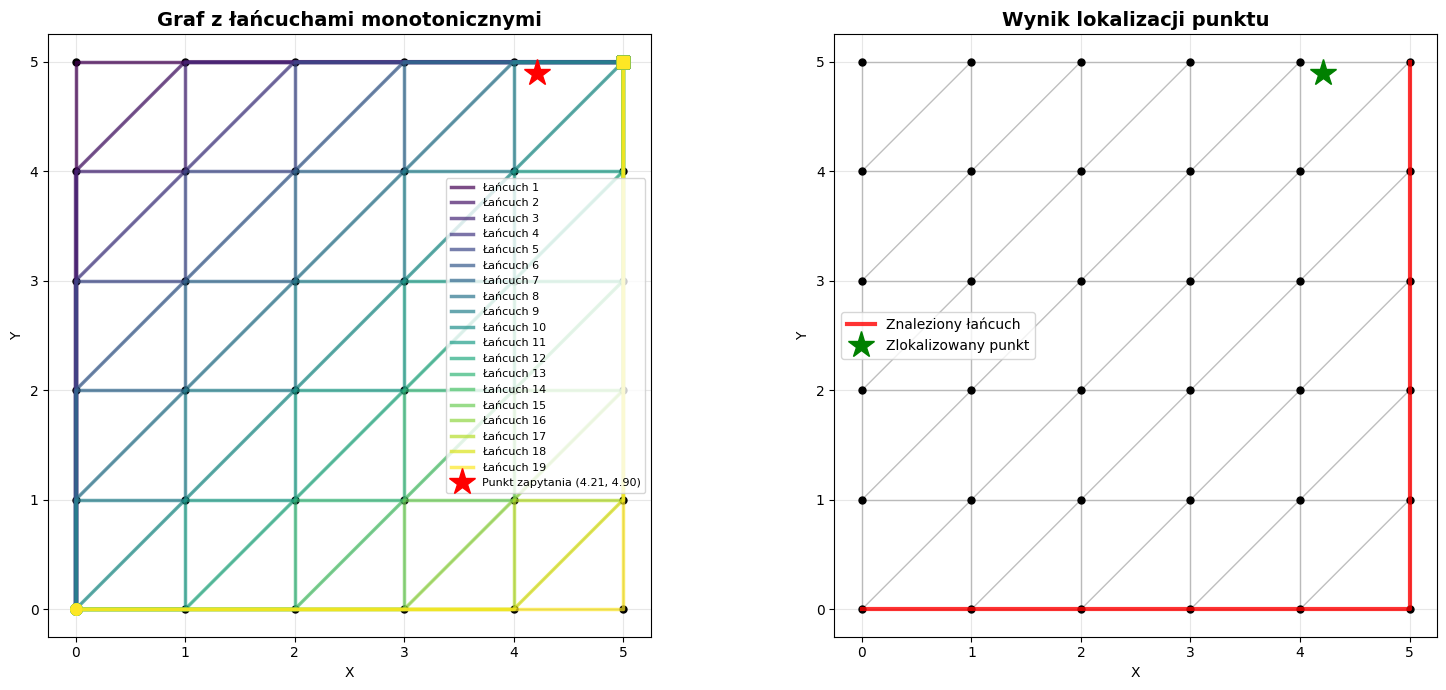

  -> Punkt 10: (3.45, 0.40)


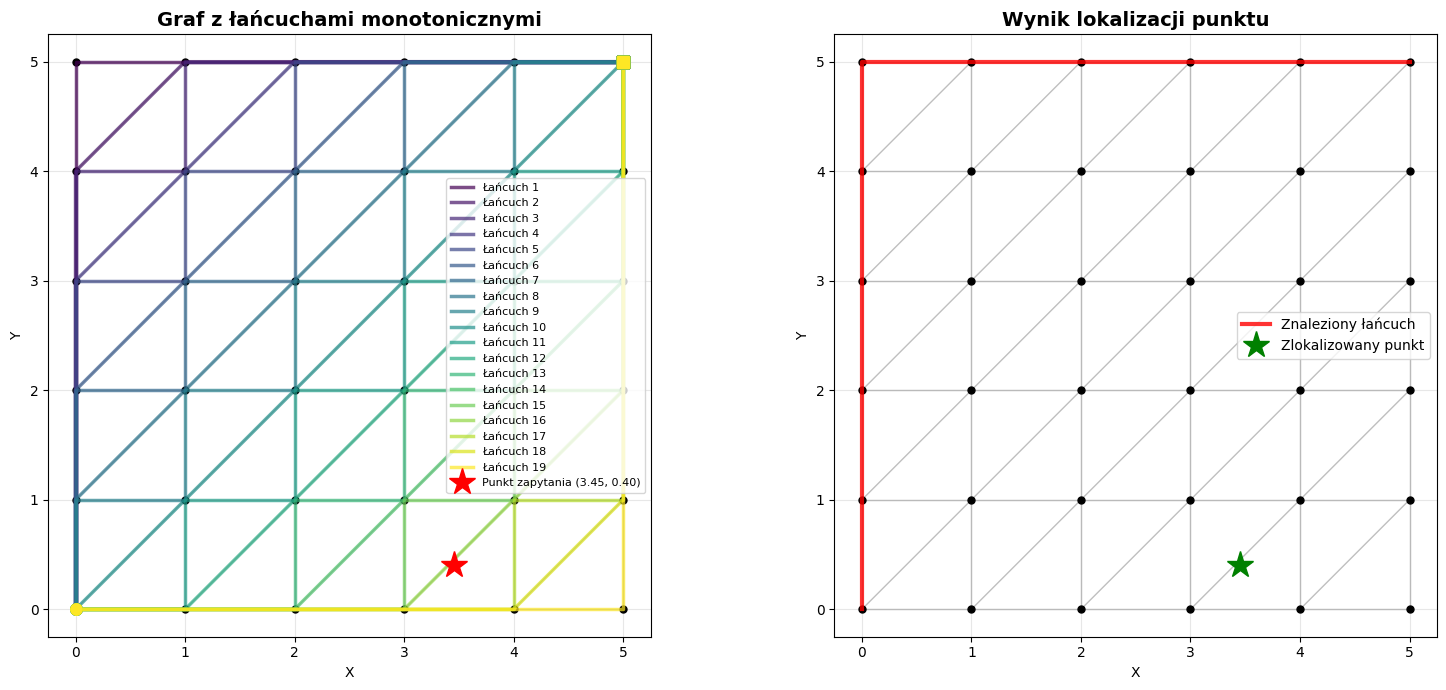


SCENARIUSZ 5: Siatka 6x4 (Trójkąty)
  -> Punkt 01: (0.55, 0.22)


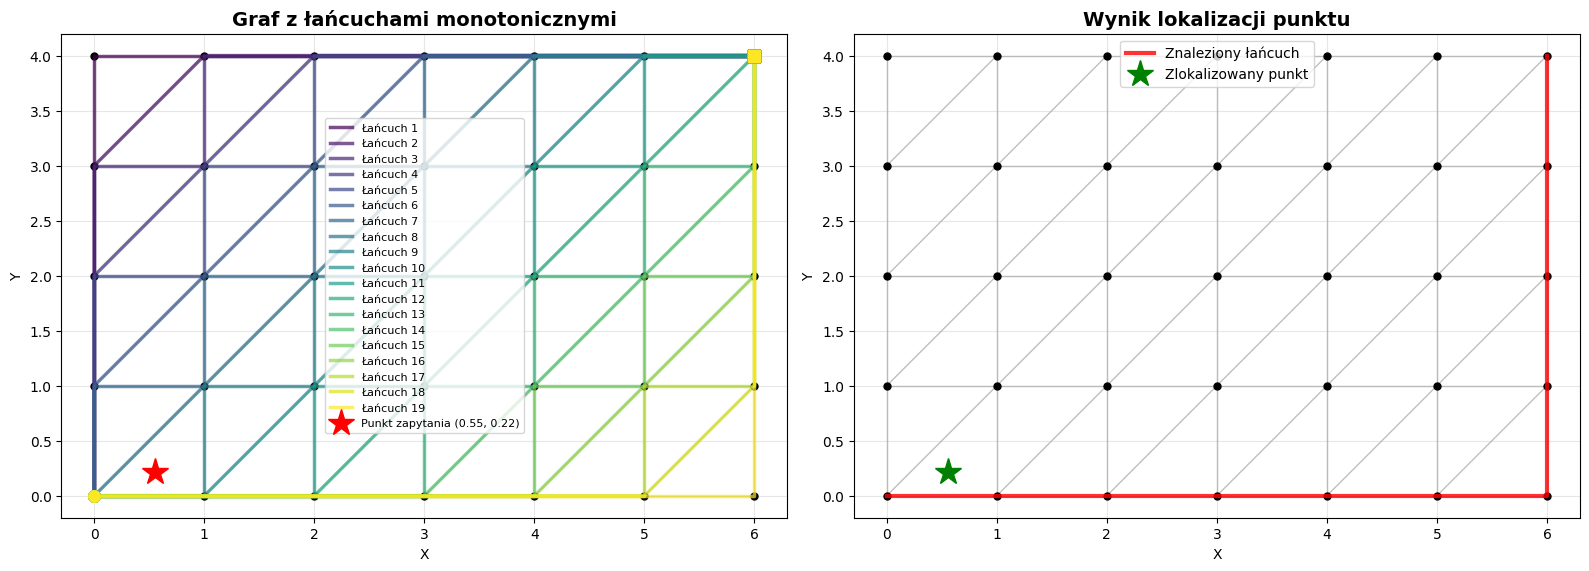

  -> Punkt 02: (3.32, 3.51)


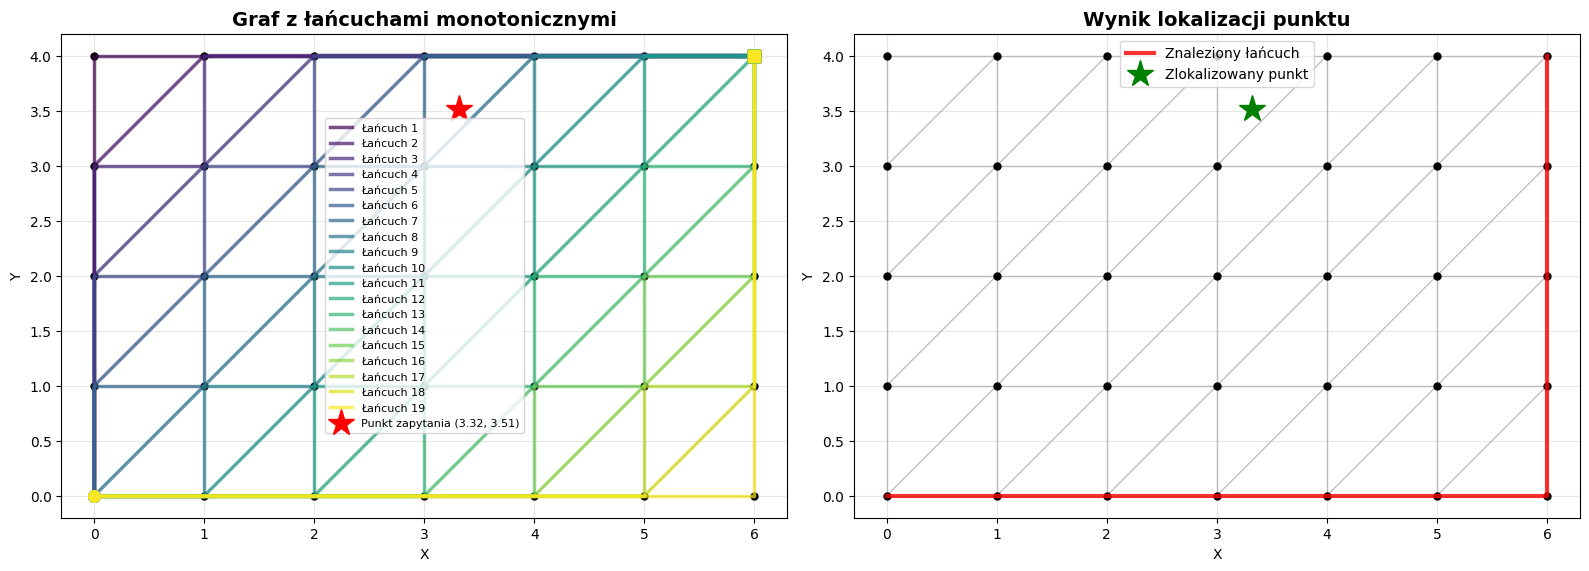

  -> Punkt 03: (3.66, 1.36)


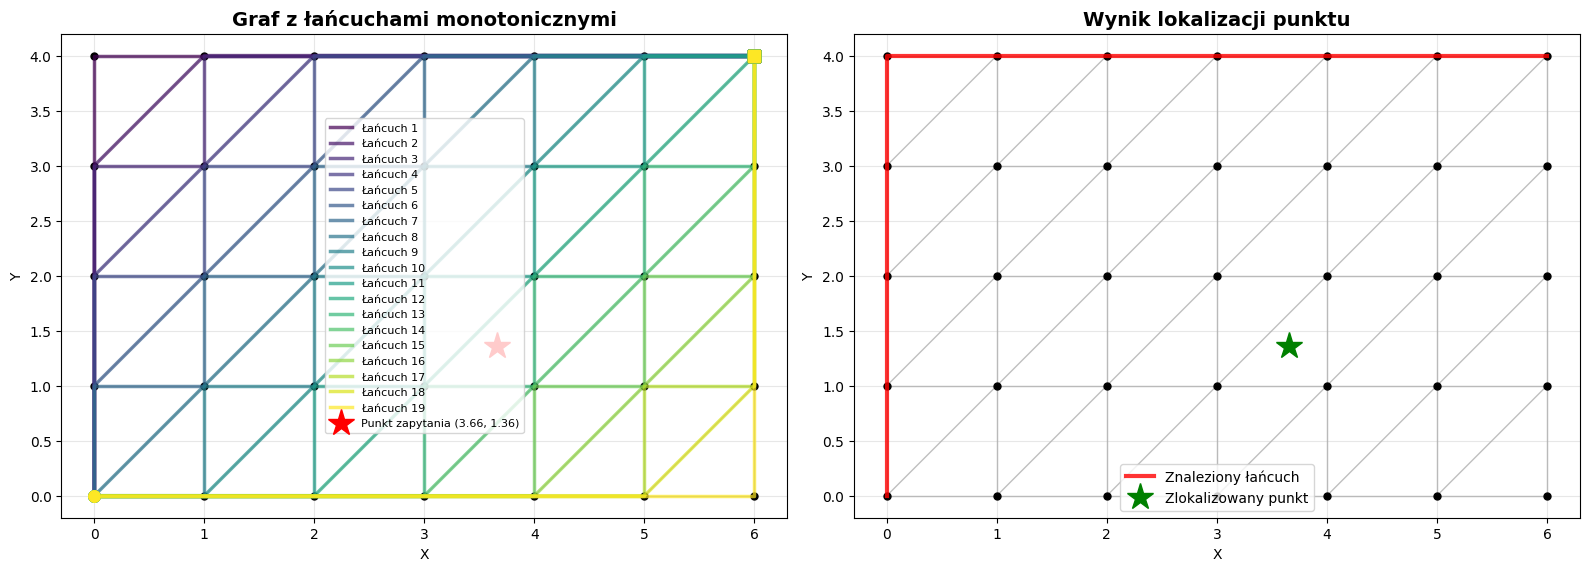

  -> Punkt 04: (5.69, 2.67)


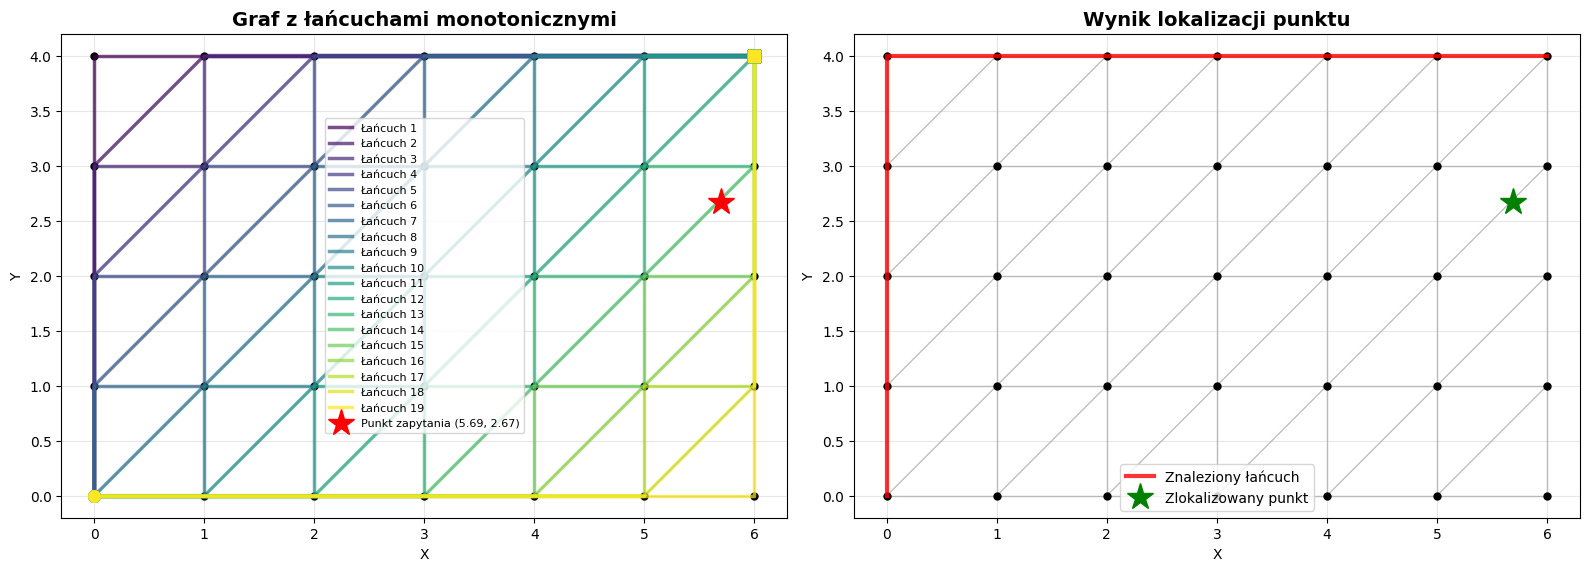

  -> Punkt 05: (2.36, 2.96)


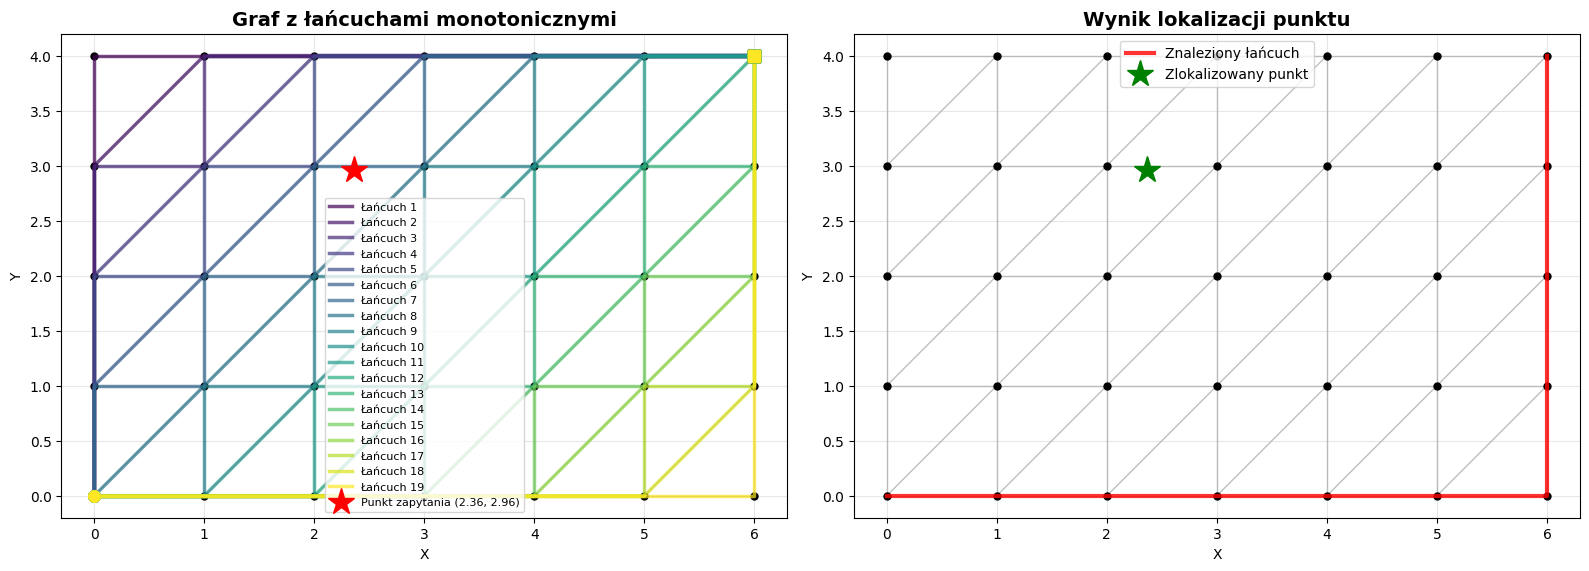

  -> Punkt 06: (4.43, 3.55)


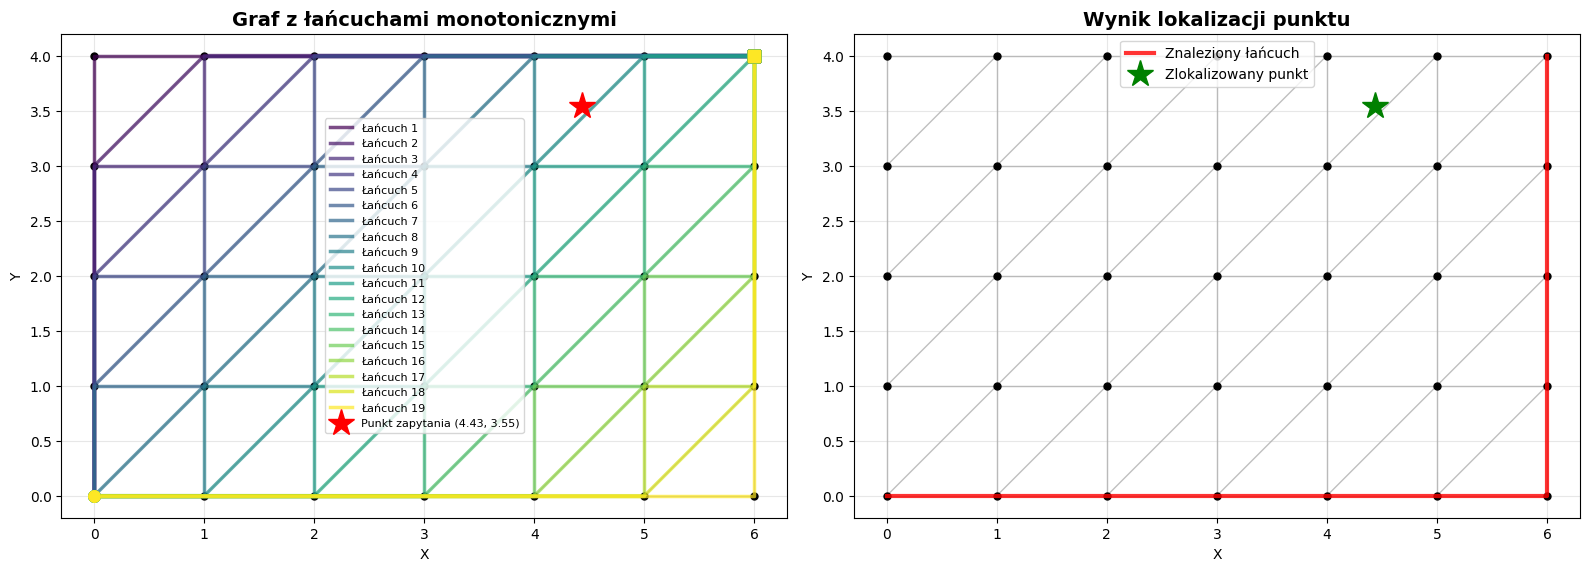

  -> Punkt 07: (2.33, 0.43)


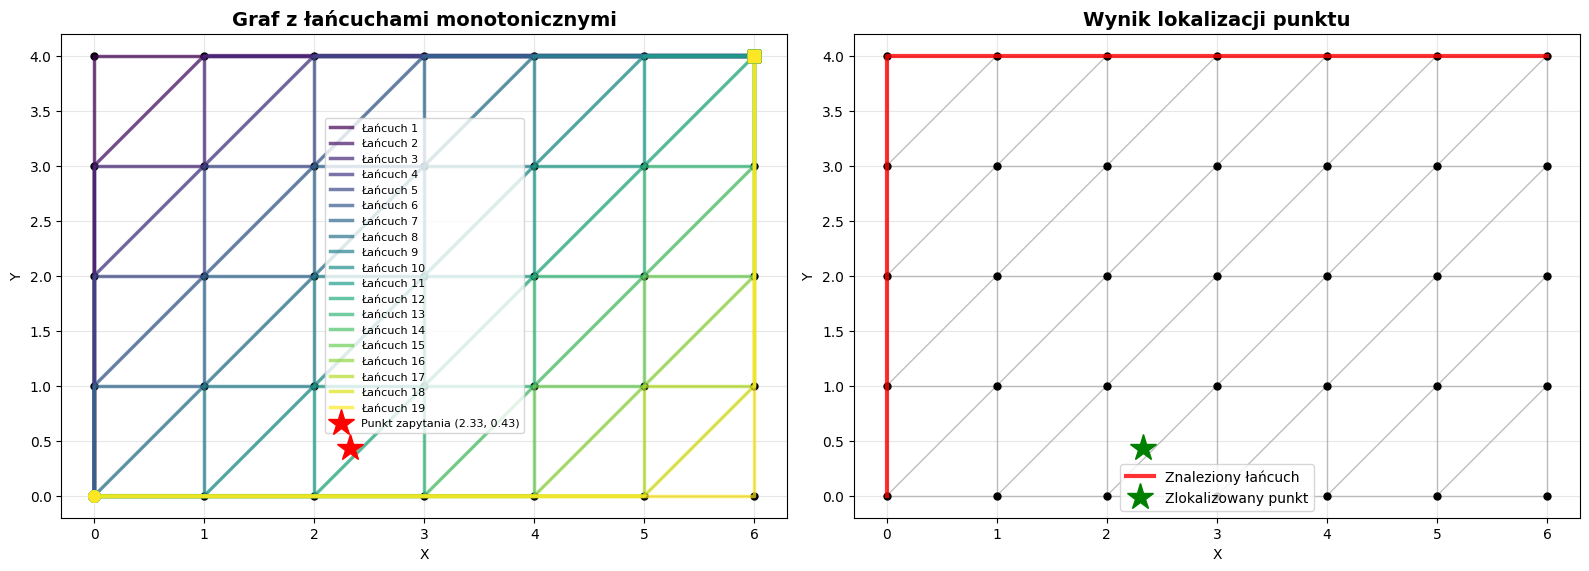

  -> Punkt 08: (0.57, 0.01)


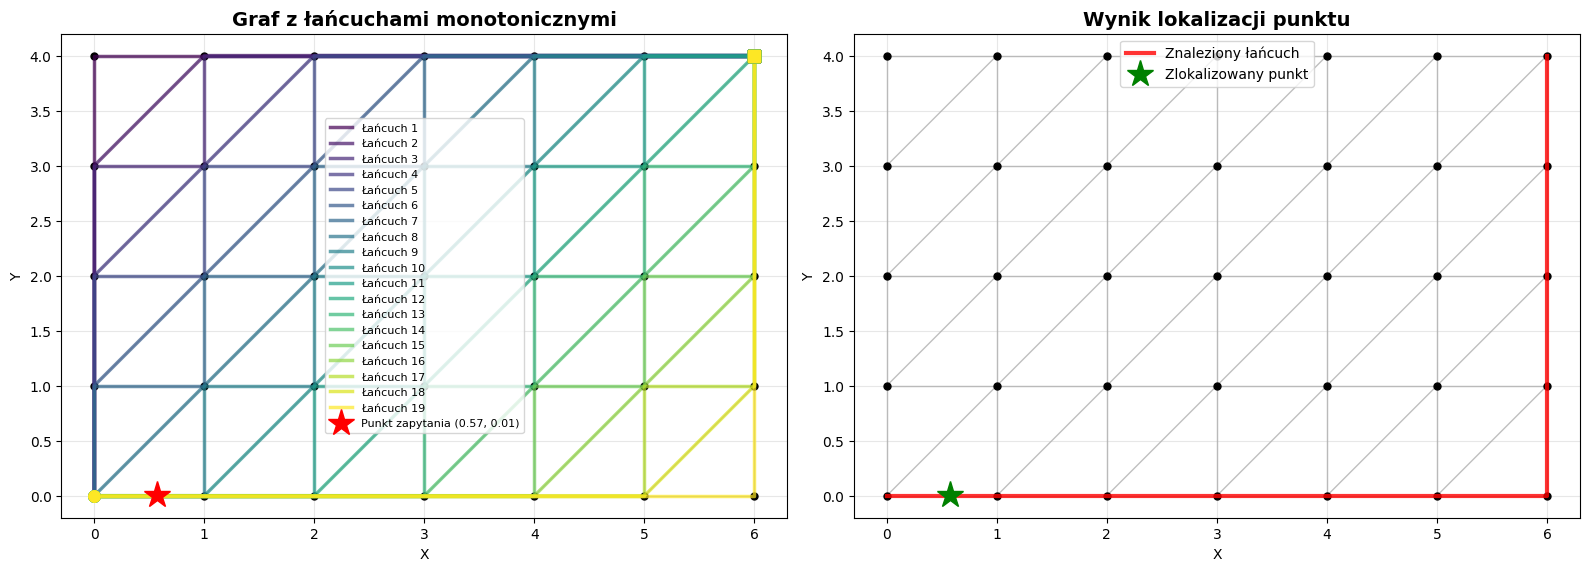

  -> Punkt 09: (2.53, 1.58)


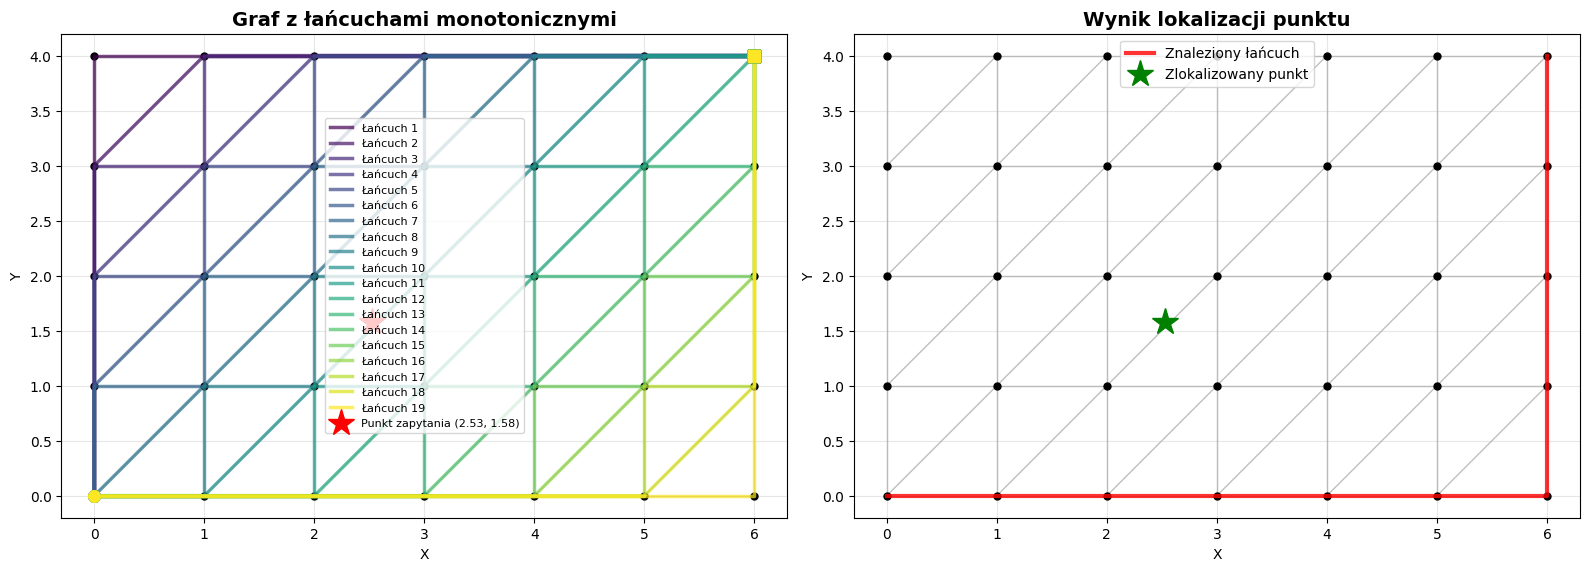

  -> Punkt 10: (5.06, 0.22)


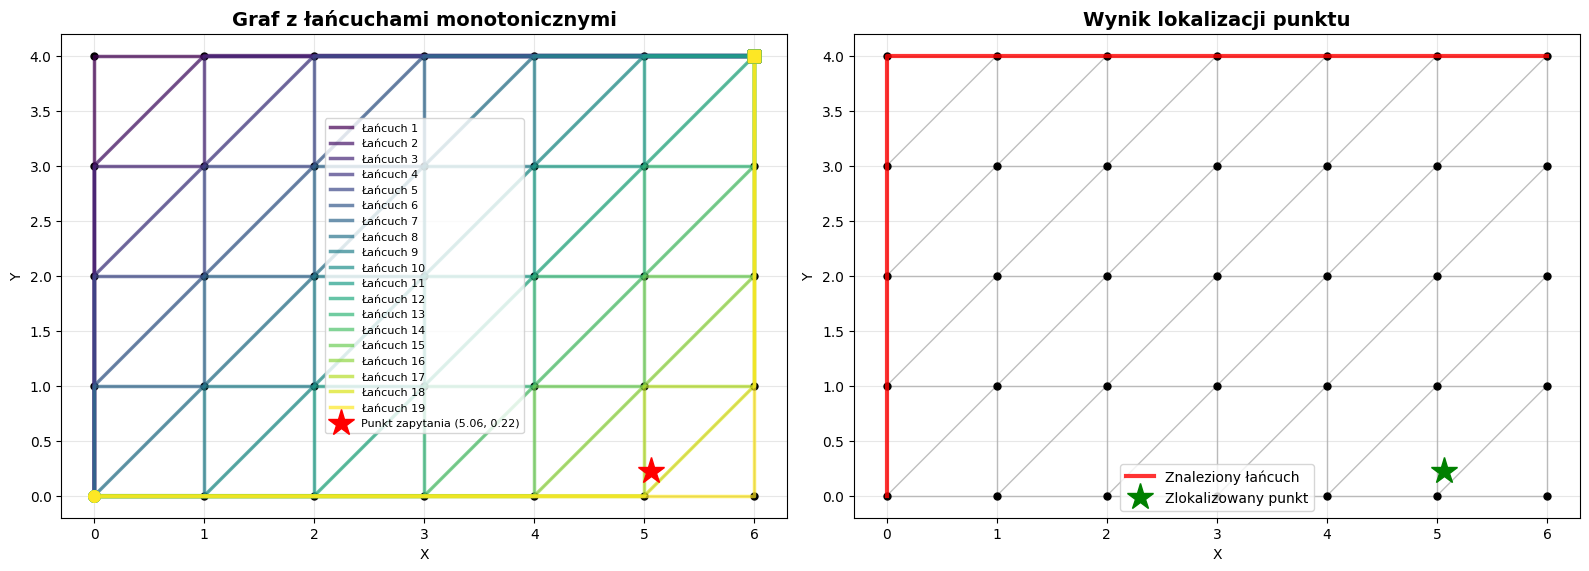

In [18]:
scenarios = [
    {
        "gen": lambda: generate_quad_grid(3, 3, skew=0.0), 
        "dims": (3, 3),
        "desc": "Siatka 3x3 (Kwadraty)"
    },
    {
        "gen": lambda: generate_quad_grid(4, 2, skew=0.5), 
        "dims": (4, 2),
        "desc": "Siatka 4x2 (Równoległoboki)"
    },
    {
        "gen": lambda: generate_tri_grid(2, 5), 
        "dims": (2, 5),
        "desc": "Siatka 2x5 (Trójkąty)"
    },
    {
        "gen": lambda: generate_tri_grid(5, 5), 
        "dims": (5, 5),
        "desc": "Siatka 5x5 (Trójkąty)"
    },
    {
        "gen": lambda: generate_tri_grid(6, 4), 
        "dims": (6, 4),
        "desc": "Siatka 6x4 (Trójkąty)"
    }
]

for s_idx, scen in enumerate(scenarios):
    desc = scen["desc"]
    w, h = scen["dims"]
    
    print(f"\n{'='*60}")
    print(f"SCENARIUSZ {s_idx + 1}: {desc}")
    print(f"{'='*60}")
    
    vertices, edges, skew = scen["gen"]()
    
    # Generuj punkty testowe
    points_to_check = []
    for _ in range(10):
        py = random.uniform(0, h)
        shift_at_y = py * skew
        px = random.uniform(0 + shift_at_y, w + shift_at_y)
        points_to_check.append((px, py))
        
    for p_idx, point in enumerate(points_to_check):
        print(f"  -> Punkt {p_idx + 1:02d}: ({point[0]:.2f}, {point[1]:.2f})")
        
        try:
            fig = visualize_point_location(vertices, edges, point)
            plt.show()
            
        except Exception as e:
            print(f"     [BŁĄD] {e}")

## 6. Analiza Złożoności

### 6.1 Złożoność Czasowa

**Preprocessing:**
- Konstrukcja grafu dualnego: $O(n^2)$
- Sortowanie topologiczne: $O(n)$
- Przypisanie krawędzi (z LCA): $O(n)$ przy stablicowanych wartościach XOR
- Eliminacja cuspów: $O(n \log n)$
- **Łączna złożoność preprocessingu: $O(n^2)$**

**Zapytanie:**
- Przeszukiwanie drzewa: $O(\log n)$ poziomów
- Wyszukiwanie binarne segmentu: $O(\log n)$
- **Łączna złożoność zapytania: $O(\log^2 n)$**

### 6.2 Złożoność Pamięciowa

- Graf planarny (wierzchołki, krawędzie, regiony): $O(n)$
- Łańcuchy monotoniczne: $O(n)$
- Drzewo wyszukiwania: $O(n)$
- **Łączna złożoność pamięciowa: $O(n)$**

## 7. Podsumowanie i Wnioski

### 7.1 Osiągnięcia Projektu

Projekt przedstawia kompletną implementację metody łańcuchów monotonicznych do rozwiązania problemu lokalizacji punktu w podziale planarnym. Kluczowe elementy:

1. **Preprocessing w czasie $O(n^2)$:** Efektywna konstrukcja struktury danych umożliwiającej szybkie zapytania
2. **Zapytania w czasie $O(\log^2 n)$:** Logarytmiczna złożoność zapytań dzięki binarnemu drzewu wyszukiwania
3. **Liniowa złożoność pamięciowa:** Optymalne wykorzystanie pamięci
4. **Obsługa regionów niemonototonicznych:** Transformacja dowolnych wielokątów poprzez eliminację cuspów

### 7.2 Możliwości Rozwoju

Potencjalne kierunki rozszerzenia projektu:

- **Dynamiczna aktualizacja struktury:** Modyfikacje drzewa przy dodawaniu/usuwaniu regionów
- **Równoległa lokalizacja:** Przetwarzanie wielu zapytań jednocześnie
- **Optymalizacja cache:** Wykorzystanie lokalności przestrzennej zapytań
- **Trójwymiarowe rozszerzenie:** Adaptacja metody do podziałów przestrzeni 3D

### 7.3 Zastosowania Praktyczne

Algorytm znajduje zastosowanie w:
- Systemach informacji geograficznej (GIS)
- Grafice komputerowej (ray tracing, collision detection)
- Robotyce (planowanie ścieżki)
- Projektowaniu układów VLSI

## 8. Bibliografia

1. **Tamassia, R.** (1993). *Preprocessing for the Chain Method of Point Location*. Lecture Notes, Computational Geometry, Brown University.

2. **Preparata, F. P., & Shamos, M. I.** (1985). *Computational Geometry: An Introduction*. Springer-Verlag, New York.

3. **Lee, D. T., & Preparata, F. P.** (1977). "Location of a point in a planar subdivision and its applications". *SIAM Journal on Computing*, 6(3), 594-606.

4. **Cormen, T. H., Leiserson, C. E., & Rivest, R. L.** (1990). *Introduction to Algorithms*. MIT Press.

5. **de Berg, M., van Kreveld, M., Overmars, M., & Schwarzkopf, O.** (2000). *Computational Geometry: Algorithms and Applications* (2nd ed.). Springer-Verlag.